In [229]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
import copy
import warnings
warnings.filterwarnings(action = 'ignore')

In [230]:
data=pd.read_csv("C:\\Users\\YashnaBehera\\Downloads\\agent_recruitment.csv")
pd.set_option('display.max_columns', None)
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [231]:
data.Office_PIN.nunique()

98

In [232]:
print('There are', '\033[1m', data.shape[0], '\033[0m', 'observations in the dataset and',
      '\033[1m', data.shape[1], '\033[0m','variables, where one refers to the ID and 21 independent \nvariables and 1 target variable (Business Sourced)')

There are  9527  observations in the dataset and  23  variables, where one refers to the ID and 21 independent 
variables and 1 target variable (Business Sourced)


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [234]:
# (data.isnull().sum()/data.shape[0])*100

There are missing values in the data.

For **`Applicant_City_PIN`**, around 1% of the data is composed by missing values; 

For **`Applicant_Occupation`**, around 12% of the data is composed by missing values; 
For **`Manager_DOJ`**,**`Manager_Joining_Designation`**,**`Manager_Current_Designation`**,**`Manager_Grade`**,**`Manager_Status`**,
**`Manager_Gender`**,**`Manager_DoB`**,**`Manager_Num_Application`**,**`Manager_Num_Coded`**,**`Manager_Num_Products`**,
**`Manager_Business2`**,**`Manager_Num_Products2`**,**`Business_Sourced`**, around 7% of the data is composed by missing values; 

##### MISSING VALUE TREATMENT




In [235]:
# data['Applicant_Occupation'].fillna(data['Applicant_Occupation'].mode()[0], inplace = True)
# data['Manager_DOJ'].fillna(data['Manager_DOJ'].mode()[0], inplace = True)
# data['Manager_Joining_Designation'].fillna(data['Manager_Joining_Designation'].mode()[0], inplace = True)
# data['Manager_Grade'].fillna(data['Manager_Grade'].mode()[0], inplace = True)
# data['Manager_Current_Designation'].fillna(data['Manager_Current_Designation'].mode()[0], inplace = True)
# data['Manager_Status'].fillna(data['Manager_Status'].mode()[0], inplace = True)
# data['Manager_Gender'].fillna(data['Manager_Gender'].mode()[0], inplace = True)
# data['Manager_DoB'].fillna(data['Manager_DoB'].mode()[0], inplace = True)
# data['Manager_Num_Application'].fillna(data['Manager_Num_Application'].mean(), inplace = True)
# data['Manager_Num_Coded'].fillna(data['Manager_Num_Coded'].mean(), inplace = True)
# data['Manager_Business'].fillna(data['Manager_Business'].mean(), inplace = True)
# data['Manager_Num_Products'].fillna(data['Manager_Num_Products'].mean(), inplace = True)
# data['Manager_Business2'].fillna(data['Manager_Business2'].mean(), inplace = True)
# data['Manager_Num_Products2'].fillna(data['Manager_Num_Products2'].mean(), inplace = True)
# data['Business_Sourced'].fillna(data['Business_Sourced'].mean(), inplace = True)

In [236]:
# data = data[pd.notnull(data['Applicant_BirthDate'])]
# data.head()

In [237]:
print('This data is composed of: \n', '\033[1m -', (data.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n', '\033[1m -', (data.dtypes == 'float64').sum(), '\033[0m',
     'Float variables \n', '\033[1m -', (data.dtypes == 'object').sum(), '\033[0m', 'Object vaiables')

This data is composed of: 
  - 2  Integer variables 
  - 8  Float variables 
  - 13  Object vaiables


In [238]:
# Finding out the integers variables
data.dtypes[data.dtypes == 'int64']

Office_PIN          int64
Business_Sourced    int64
dtype: object

In [239]:
data['Office_PIN'] = data['Office_PIN'].astype('category')
data['Business_Sourced'] = data['Business_Sourced'].astype('category')

In [240]:
# Finding out the float variables
data.dtypes[data.dtypes == 'float64']

Applicant_City_PIN         float64
Manager_Grade              float64
Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Business           float64
Manager_Num_Products       float64
Manager_Business2          float64
Manager_Num_Products2      float64
dtype: object

In [241]:
data['Applicant_City_PIN'] = data['Applicant_City_PIN'].astype('category')
data['Manager_Grade'] = data['Manager_Grade'].astype('category')
#data['Manager_Num_Application'] = data['Manager_Num_Application'].fillna(0)
data['Manager_Num_Application'] = data['Manager_Num_Application'].astype('category')

In [242]:
# Finding out the object variables
data.dtypes[data.dtypes == 'object']

ID                             object
Application_Receipt_Date       object
Applicant_Gender               object
Applicant_BirthDate            object
Applicant_Marital_Status       object
Applicant_Occupation           object
Applicant_Qualification        object
Manager_DOJ                    object
Manager_Joining_Designation    object
Manager_Current_Designation    object
Manager_Status                 object
Manager_Gender                 object
Manager_DoB                    object
dtype: object

In [243]:
#Typecasting the object variables to categoriy
data['ID'] = data['ID'].astype('category')
data['Applicant_Gender'] = data['Applicant_Gender'].astype('category')
data['Applicant_Marital_Status'] = data['Applicant_Marital_Status'].astype('category')
data['Applicant_Occupation'] = data['Applicant_Occupation'].astype('category')
data['Applicant_Qualification'] = data['Applicant_Qualification'].astype('category')
data['Manager_Joining_Designation'] = data['Manager_Joining_Designation'].astype('category')
data['Manager_Current_Designation'] = data['Manager_Current_Designation'].astype('category')
data['Manager_Status'] = data['Manager_Status'].astype('category')
data['Manager_Gender'] = data['Manager_Gender'].astype('category')


In [244]:
data['Application_Receipt_Date'] = pd.to_datetime(data['Application_Receipt_Date'])
data['Applicant_BirthDate'] = pd.to_datetime(data['Applicant_BirthDate'])
data['Manager_DOJ'] = pd.to_datetime(data['Manager_DOJ'])
data['Manager_DoB'] = pd.to_datetime(data['Manager_DoB'])

In [245]:
# extracting new columns from "Application_Receipt_Date"

# date of application
data['doA'] = data['Application_Receipt_Date'].dt.day

# month of application
data['moA'] = data['Application_Receipt_Date'].dt.month

# week of application
data['woA'] = data['Application_Receipt_Date'].dt.day_name()

# year of application
data['yoA'] = data['Application_Receipt_Date'].dt.year

In [246]:
# checking new extracted columns using datetime
data[['Application_Receipt_Date','doA',
      'moA','woA',
      'yoA']].tail(10)

,Application_Receipt_Date,doA,moA,woA,yoA
9517,2008-07-01,1,7,Tuesday,2008
9518,2008-07-01,1,7,Tuesday,2008
9519,2008-07-01,1,7,Tuesday,2008
9520,2008-07-01,1,7,Tuesday,2008
9521,2008-07-01,1,7,Tuesday,2008
9522,2008-07-01,1,7,Tuesday,2008
9523,2008-07-01,1,7,Tuesday,2008
9524,2008-07-01,1,7,Tuesday,2008
9525,2008-07-01,1,7,Tuesday,2008
9526,2008-07-01,1,7,Tuesday,2008


In [17]:
data["Applicant_age"] = round(((data['Application_Receipt_Date']-data['Applicant_BirthDate']).dt.days)/365,0)
data["Applicant_age"] 
#data["Applicantion_age"].head()

0       35.0
1       24.0
2       41.0
3       19.0
4       22.0
        ... 
9522    38.0
9523    52.0
9524    33.0
9525    22.0
9526    32.0
Name: Applicant_age, Length: 9527, dtype: float64

In [18]:
data["Manager_exp"] = round(((data['Application_Receipt_Date'].min()-data['Manager_DOJ']).dt.days)/365,0)
#data["Manager_exp"] = data["Manager_exp"].fillna(0)
data["Manager_exp"] = data["Manager_exp"].astype('float')
data["Manager_exp"].head()

0    1.0
1    1.0
2    1.0
3    4.0
4    1.0
Name: Manager_exp, dtype: float64

In [19]:
data["Manager_age"] = round(((data['Application_Receipt_Date'].min()-data['Manager_DoB']).dt.days)/365,0)
#data["Manager_age"] = data["Manager_age"].fillna(0)
data["Manager_age"] = data["Manager_age"].astype('float')
data["Manager_age"].head()

0    29.0
1    29.0
2    38.0
3    29.0
4    36.0
Name: Manager_age, dtype: float64

In [20]:
data.dtypes

ID                                      category
Office_PIN                              category
Application_Receipt_Date          datetime64[ns]
Applicant_City_PIN                      category
Applicant_Gender                        category
Applicant_BirthDate               datetime64[ns]
Applicant_Marital_Status                category
Applicant_Occupation                    category
Applicant_Qualification                 category
Manager_DOJ                       datetime64[ns]
Manager_Joining_Designation             category
Manager_Current_Designation             category
Manager_Grade                           category
Manager_Status                          category
Manager_Gender                          category
Manager_DoB                       datetime64[ns]
Manager_Num_Application                 category
Manager_Num_Coded                        float64
Manager_Business                         float64
Manager_Num_Products                     float64
Manager_Business2   

In [21]:
numerical = data.select_dtypes(include=['int64','float64'])
numerical.dtypes

Manager_Num_Coded                 float64
Manager_Business                  float64
Manager_Num_Products              float64
Manager_Business2                 float64
Manager_Num_Products2             float64
date_Application_Receipt_Date       int64
month_Application_Receipt_Date      int64
year_Application_Receipt_Date       int64
Applicant_age                     float64
Manager_exp                       float64
Manager_age                       float64
dtype: object

In [23]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

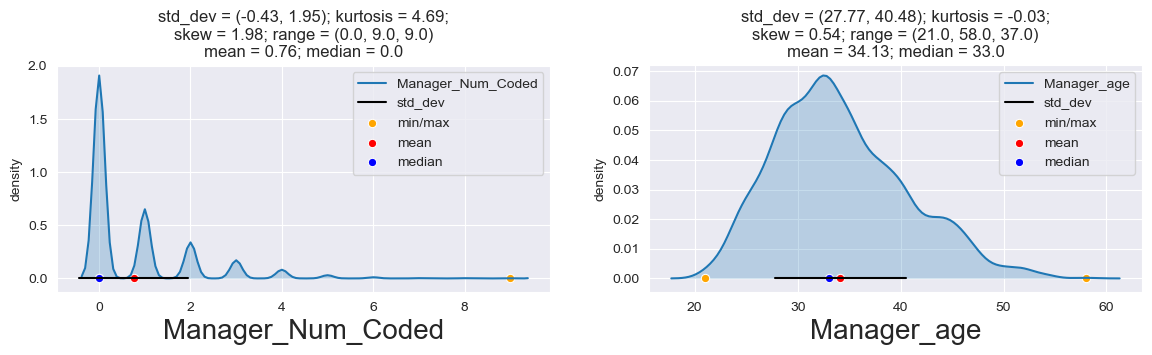

In [84]:
UVA_numeric(data,['Manager_Num_Coded', 'Manager_age'])

**Manager_Num_Coded**

* Most of the manager have not recuited any agents in the last 3 months, very few portion of managers have recuited 8 agents in last 3 months 
    
**Manager_age**

* Meadian age = 33
* Most manager age between 21-58 years.
* Skewness = 0.54 Manager age is not biased towards young managers
* Kurtosis = -0.03 very less likely to have extreme values

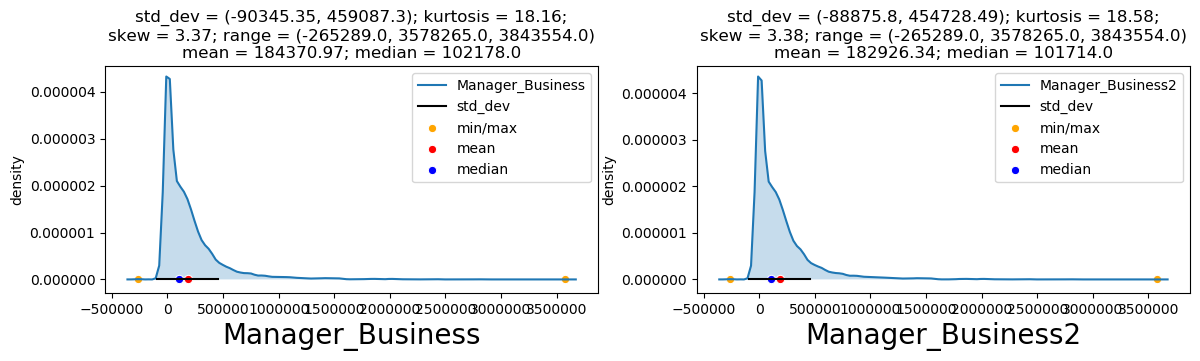

In [26]:
UVA_numeric(data,['Manager_Business','Manager_Business2'])

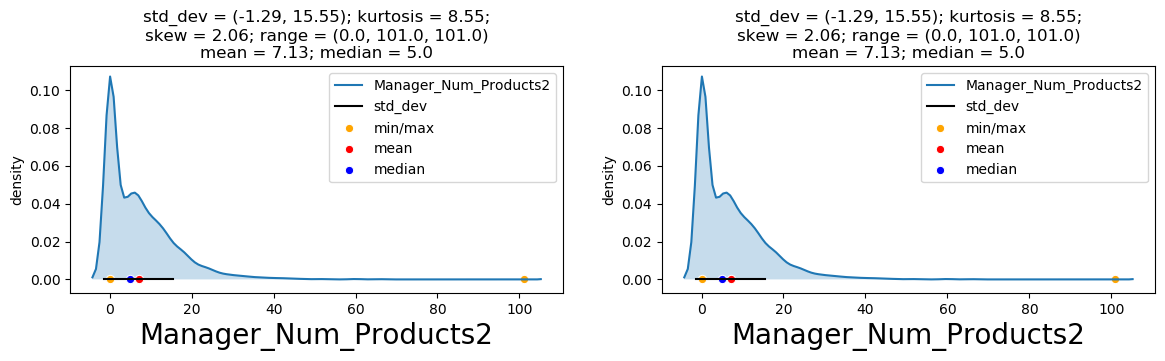

In [27]:
UVA_numeric(data,['Manager_Num_Products2','Manager_Num_Products2'])

**Need to Remove Outliers to visulaise these plots**

In [28]:
manager_details = ['Manager_Business', 'Manager_Num_Products', 
                   'Manager_Business2', 'Manager_Num_Products2']

application_date = ['Applicantion_age','date_Application_Receipt_Date', 'month_Application_Receipt_Date', 
                    'year_Application_Receipt_Date']

In [29]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[manager_details]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['Manager_Business'] < factor*cm_data['Manager_Business'].std()]
cm_data = cm_data[cm_data['Manager_Num_Products'] < factor*cm_data['Manager_Num_Products'].std()]
cm_data = cm_data[cm_data['Manager_Business2'] < factor*cm_data['Manager_Business2'].std()]
cm_data = cm_data[cm_data['Manager_Num_Products2'] < factor*cm_data['Manager_Num_Products2'].std()]

# checking how many points removed
len(data), len(cm_data)

(9527, 7524)

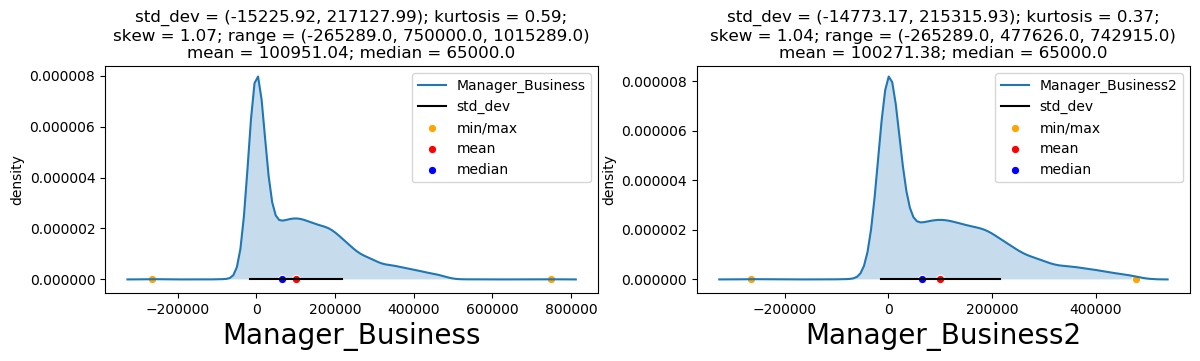

In [30]:
UVA_numeric(cm_data,['Manager_Business','Manager_Business2'])

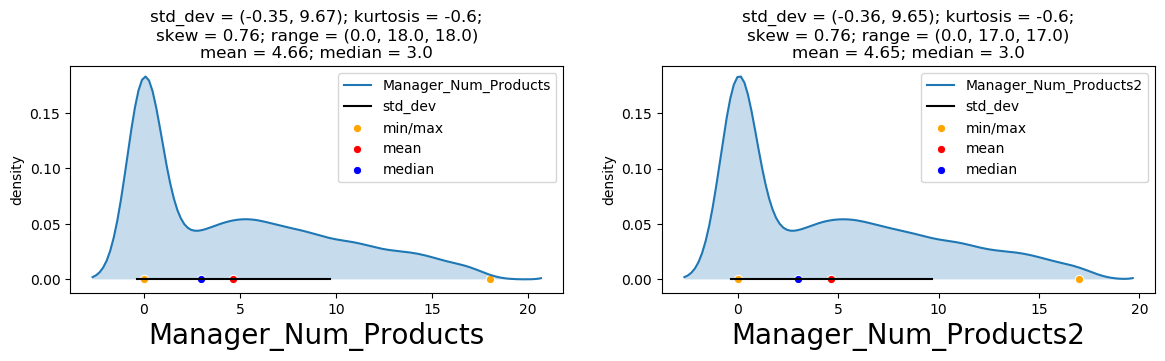

In [31]:
UVA_numeric(cm_data,['Manager_Num_Products','Manager_Num_Products2'])



* Median is same for for both 3.0
* Skewness = 0.76 No. of products sold by manager is not baised towards less number of products
    

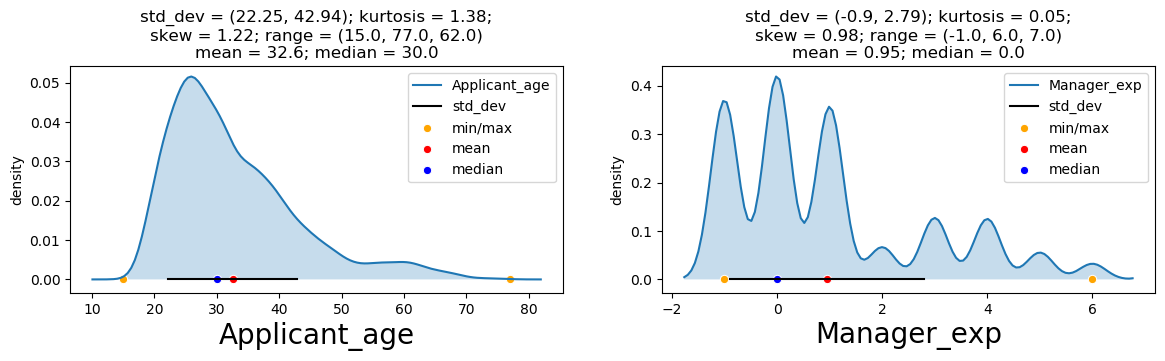

In [33]:
UVA_numeric(data,['Applicant_age','Manager_exp'])

**Applicants_Age**

* Meadian age = 30 years
* Applicants' age between 21-58 years.
* Skewness = 1.22 applicants' age is not biased towards young ones
* Kurtosis = 1.38 likely to have outliers
    
**Manager_exp**

* Most of the managers have a years experience there are mangers who do not have much experience and have recently joined the company.

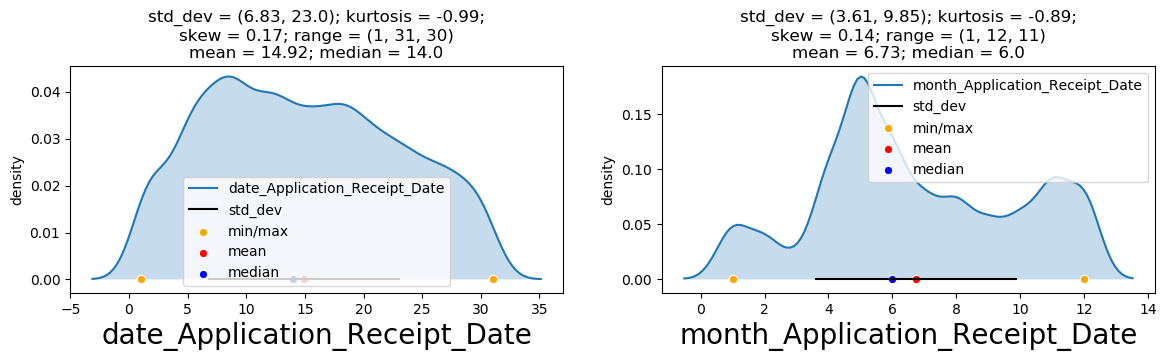

In [60]:
UVA_numeric(data,['date_Application_Receipt_Date', 'month_Application_Receipt_Date'])


*    **data_Application_Receipt_Date**:
    *   Date has a very uniform distribution

*   **month_Application_Receipt_Date**:
    *   maximum application were submitted in the month of May and December

In [34]:
data.select_dtypes(include = [ 'category']).dtypes

ID                             category
Office_PIN                     category
Applicant_City_PIN             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application        category
Business_Sourced               category
dtype: object

In [35]:
grp1=['Office_PIN','Applicant_City_PIN']
grp2=['Applicant_Gender','Manager_Gender']
grp3=['Applicant_Marital_Status','Applicant_Occupation']
grp4=['Manager_Joining_Designation','Manager_Current_Designation']
grp5=['Manager_Status', 'Manager_Grade']
grp6=['Manager_Num_Application','Business_Sourced']
grp7=['Applicant_Qualification']

In [103]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index,color="Purple")
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.grid(False)
    #plt.tight_layout()

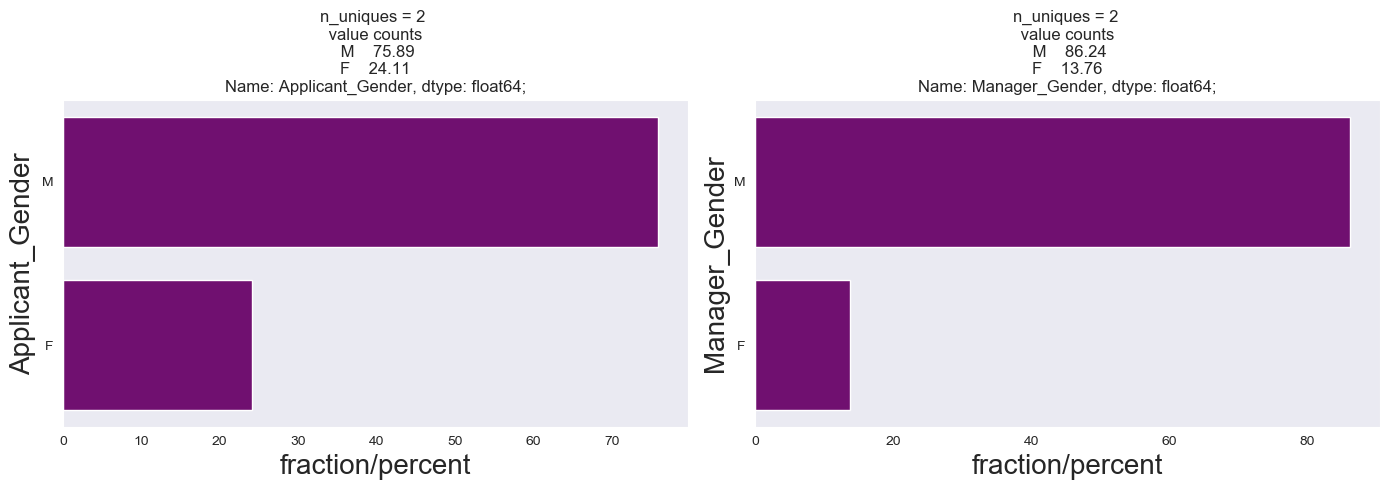

In [96]:
UVA_category(data, grp2)

*    **Applicant_Gender:**
    *    % Male customers is 75 where as Female customers are 55%.
*    **Manager_Gender:**
    *    % Male customers is 86 where as Female customers are 14%.

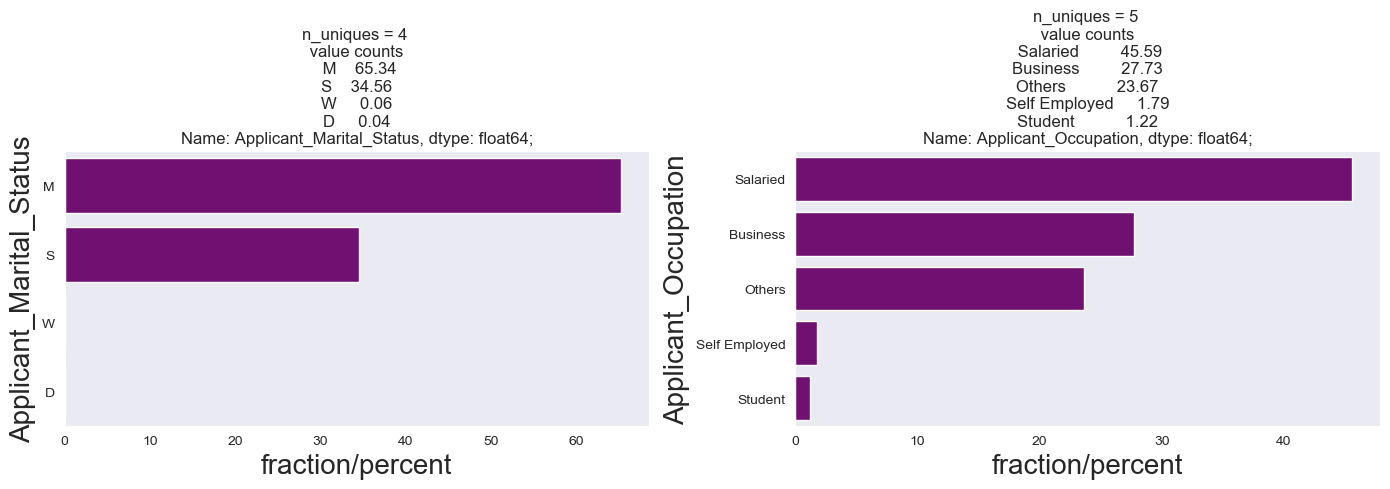

In [97]:
UVA_category(data, grp3)

*    **Applicant_Marital_Status:**
    *    Mostly applicants are either married or single and there are hardly any divorce or widow applicants
*    **Applicant_Occupation:**
    * 45% of the applicants are salaried people and  hardly 1-2% applicants are self employed and students

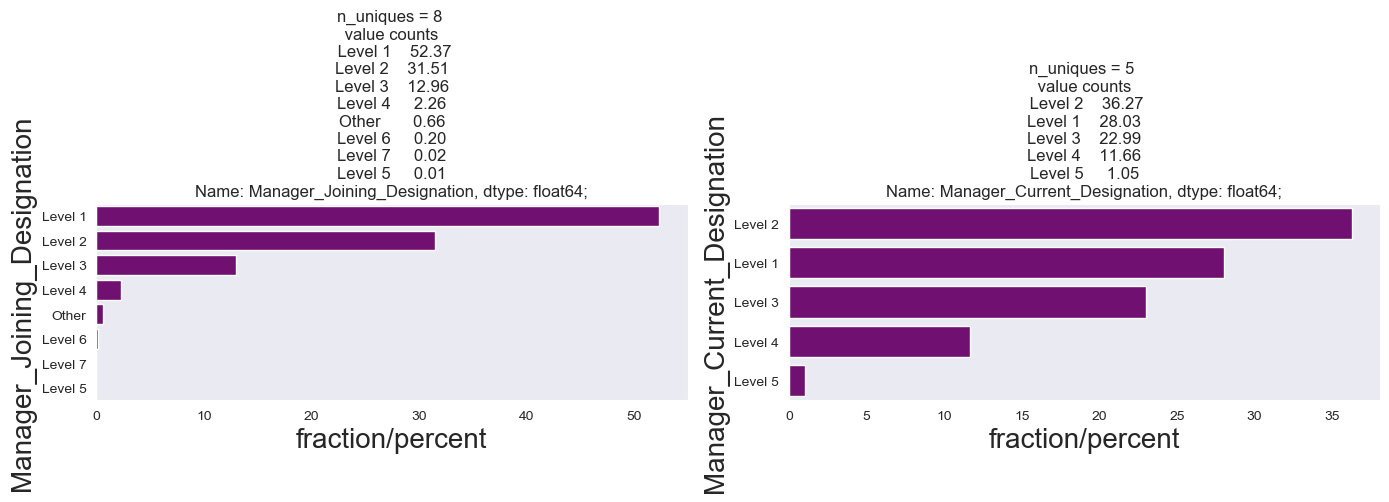

In [100]:
UVA_category(data, grp4)

*    **Manager_Joining_Designation:**
    *    Most of the managers joined in Level 1,2,3,4
    *    More than 50% join in level 1
*    **Manager_Joining_Designation:**
    *    Manager who had joined have been promoted to next level
    *    Very few have been promoted to level 5

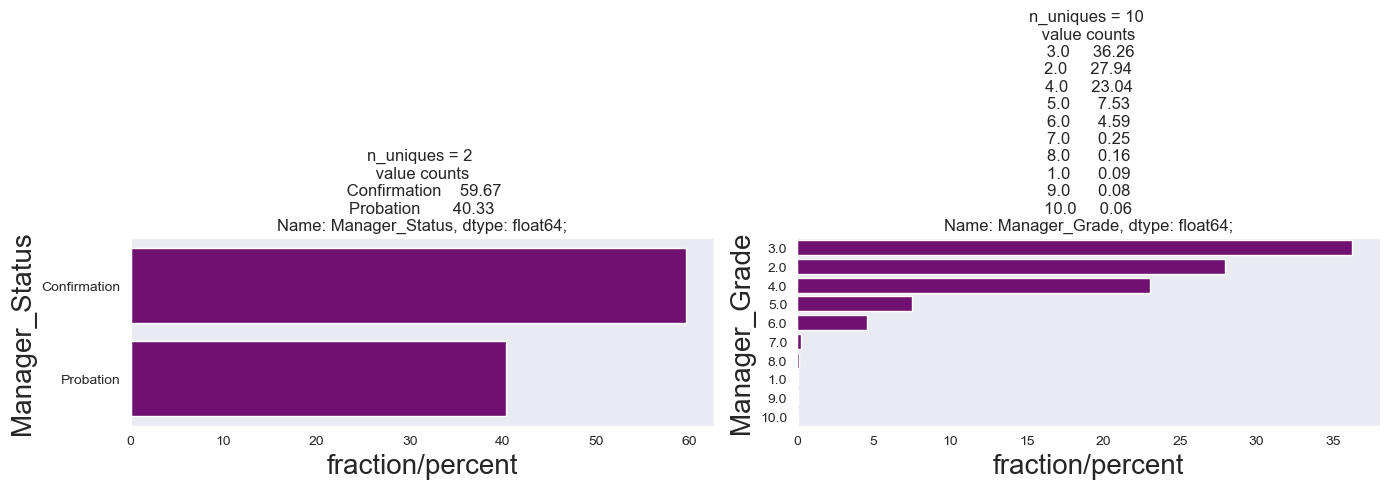

In [101]:
UVA_category(data, grp5)

*    **Manager_Status:**
    *    60% of managers are on confirmation while 40% of manager are on probation period
*    **Manager_Grade:**
    *    36% of managers are in grade 3

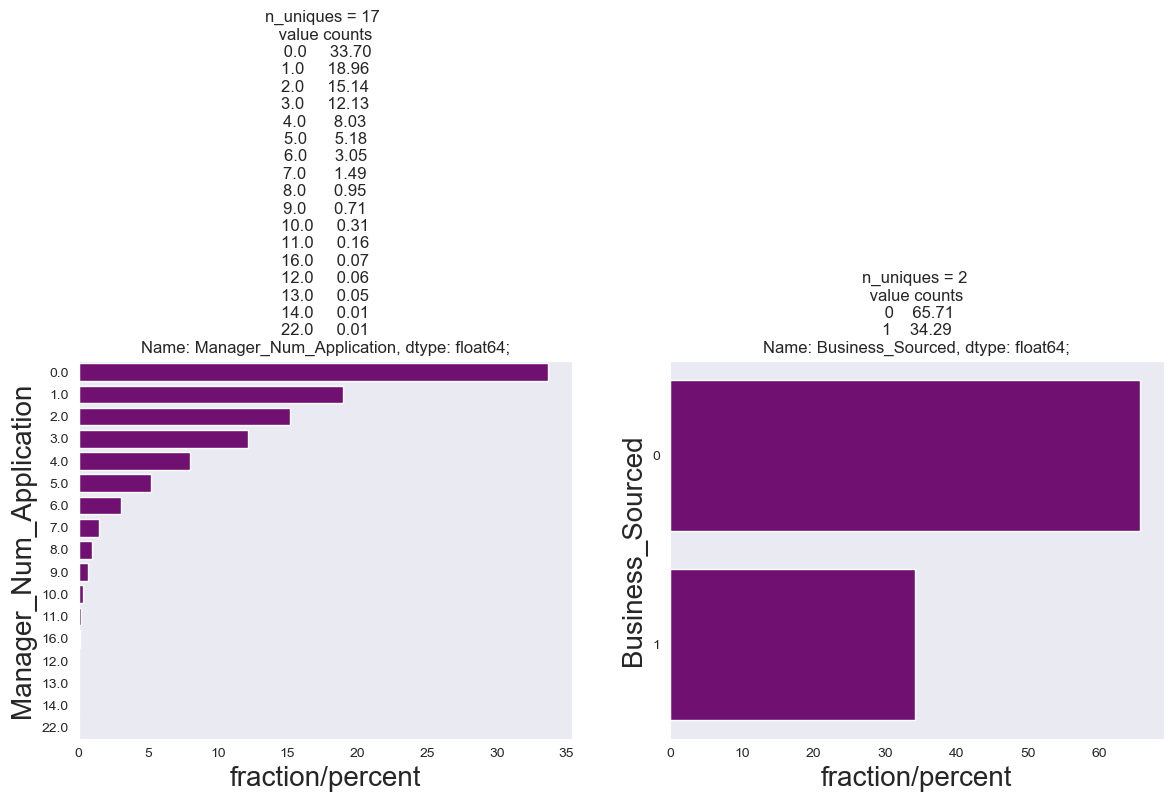

In [104]:
UVA_category(data, grp6)

*    **Manager_Num_Application:**
    *   Most of the managers have not processed any application in past 3 months 
    *   only 0.01% managers have processed 14 to 22 applications in past 3 months
*    **Business_Sourced:**
    *   65% applicants are not not becoming agents

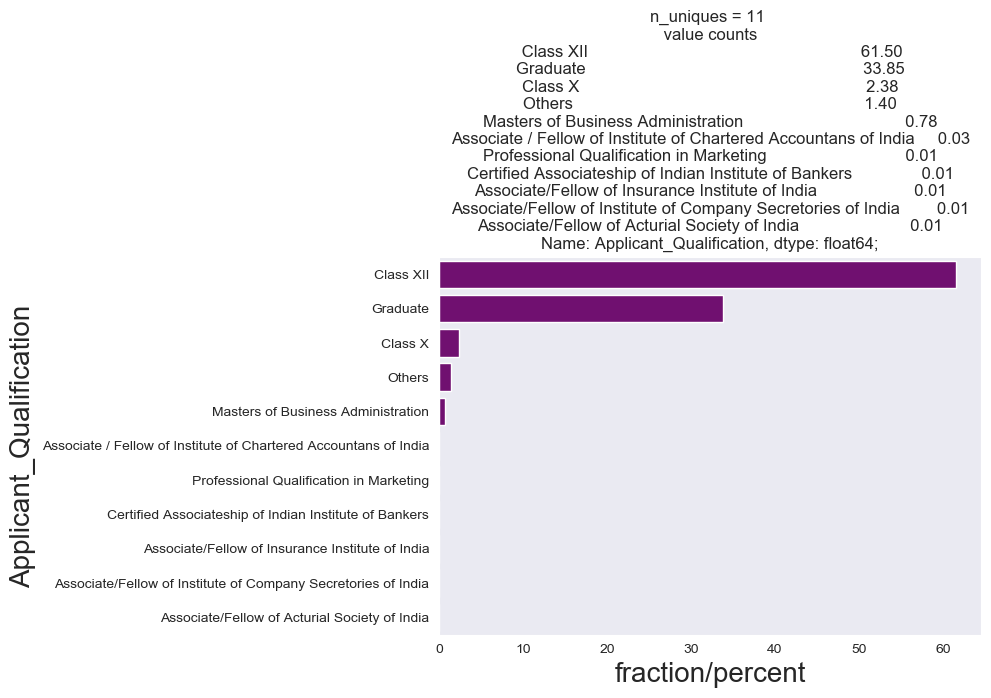

In [105]:
UVA_category(data, grp7)

*    **Applicant_Qualification:**
    *    Applicants who have completed 12 and have done graduation are more tha others

In [57]:
def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

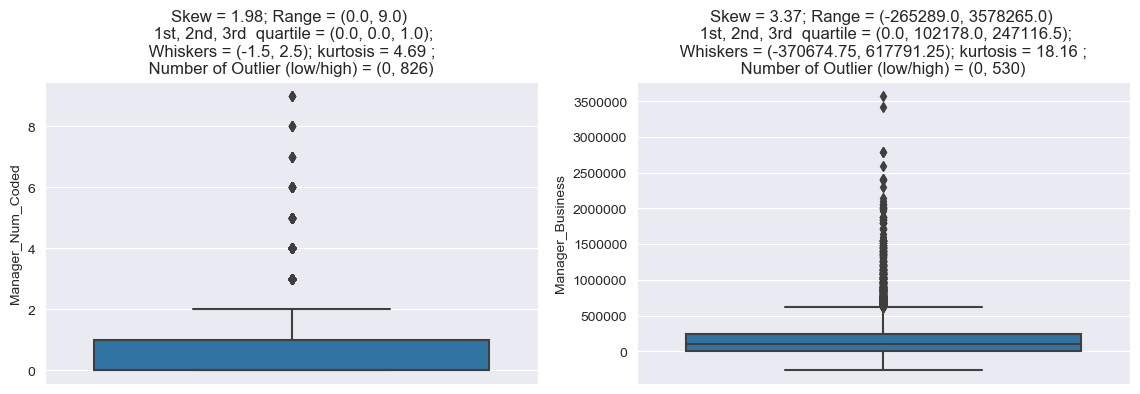

In [59]:
UVA_boxplot(data,['Manager_Num_Coded', 'Manager_Business'],include_outlier = False)

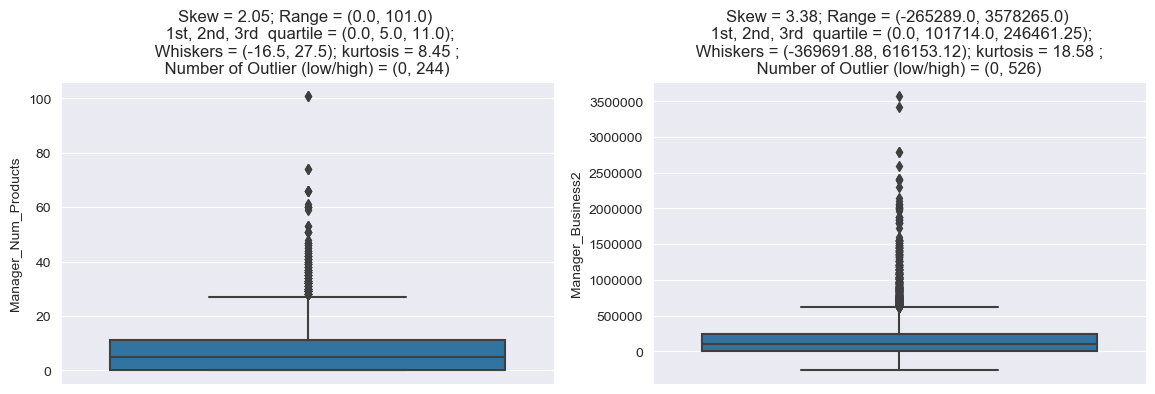

In [60]:
UVA_boxplot(data,['Manager_Num_Products', 'Manager_Business2'])

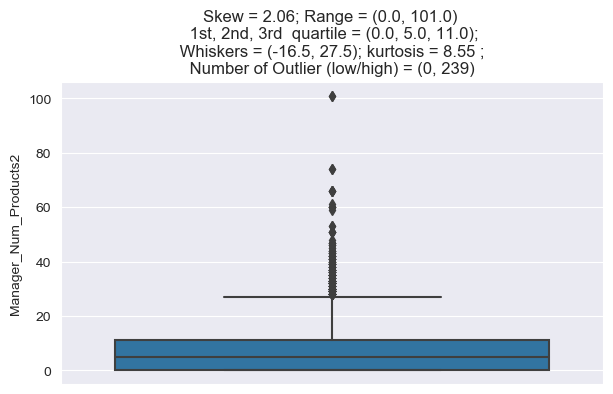

In [61]:
UVA_boxplot(data,['Manager_Num_Products2'])

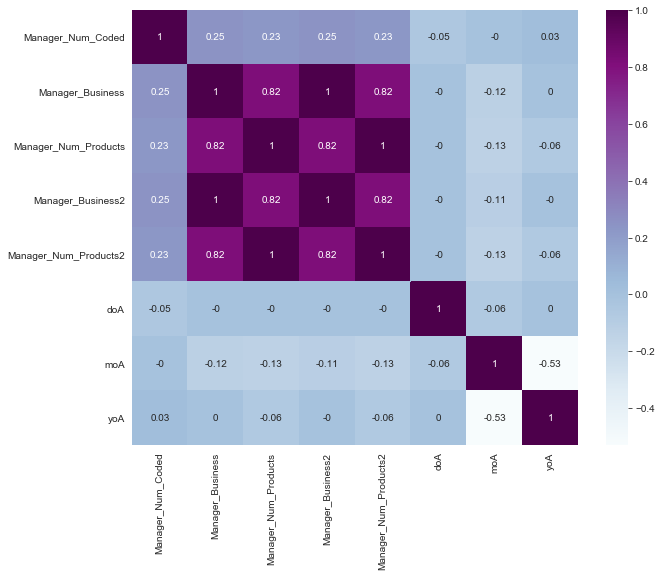

In [247]:
rounded = round(data.corr(method = 'kendall'),2)
plt.figure(figsize=(10,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

In [99]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
# data_encoded = copy.deepcopy(data)
# data_encoded.loc[:,['Applicant_Gender','Manager_Gender','Applicant_Marital_Status',
#                     'Applicant_Occupation','Manager_Joining_Designation','Manager_Current_Designation',
#                     'Manager_Status', 'Manager_Grade','Manager_Num_Application']] = data_encoded.loc[:,['Applicant_Gender','Manager_Gender',
#                     'Applicant_Marital_Status','Applicant_Occupation','Manager_Joining_Designation',
#                     'Manager_Current_Designation','Manager_Status', 'Manager_Grade','Manager_Num_Application']].apply(LabelEncoder().fit_transform) 

In [72]:
manager_details = ['Manager_Business', 'Manager_Num_Products', 
                   'Manager_Business2', 'Manager_Num_Products2']

application_date = ['Applicantion_age','date_Application_Receipt_Date', 'month_Application_Receipt_Date', 
                    'year_Application_Receipt_Date']

In [ ]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='Applicant_Gender',
    y='Applicantion_age',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 2)
sns.boxplot( x='Applicant_Gender',
    y='Vintage',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 3)
sns.boxplot( x='Applicant_Gender',
    y='Avg_Account_Balance',
    data=credit_card,color='yellow')
plt.style.use('dark_background')
plt.grid(False)

In [74]:
#'Applicantion_age','Manager_exp'
bins = [10, 35, 55, 75]
labels = ['Young','Adult', 'Old']
data['agerange'] = pd.cut(data.Applicant_age, bins, labels = labels,include_lowest = True)

bins = [0, 3, 5, 6]
labels = ['junior','Executive', 'manager']
data['mgr_exp'] = pd.cut(data.Manager_exp, bins, labels = labels,include_lowest = True)

bins = [20, 38, 48, 50]
labels = ['associate','senior','chief']
data['mgr_age'] = pd.cut(data.Manager_age, bins, labels = labels,include_lowest = True)



data.head(10)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,date_Application_Receipt_Date,month_Application_Receipt_Date,week_Application_Receipt_Date,year_Application_Receipt_Date,Applicant_age,Manager_exp,Manager_age,agerange,mgr_exp,mgr_age
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,16,4,Monday,2007,35.0,1.0,29.0,Young,junior,associate
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,16,4,Monday,2007,24.0,1.0,29.0,Young,junior,associate
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,Level 1,Level 1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,16,4,Monday,2007,41.0,1.0,38.0,Adult,junior,associate
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,Level 1,Level 3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,16,4,Monday,2007,19.0,4.0,29.0,Young,Executive,associate
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,Level 1,Level 1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,16,4,Monday,2007,22.0,1.0,36.0,Young,junior,associate
5,FIN1000006,814112,2007-04-16,814114.0,M,1988-03-23,S,Others,Class XII,2006-01-17,Level 1,Level 1,2.0,Confirmation,M,1979-02-20,0.0,0.0,247118.0,24.0,247118.0,24.0,1,16,4,Monday,2007,19.0,1.0,28.0,Young,junior,associate
6,FIN1000007,842001,2007-04-16,844118.0,M,1969-02-05,M,Business,Class XII,2003-09-01,Level 1,Level 1,2.0,Confirmation,M,1969-05-28,0.0,0.0,315119.0,27.0,315119.0,27.0,1,16,4,Monday,2007,38.0,4.0,38.0,Adult,Executive,associate
7,FIN1000008,800001,2007-04-16,844103.0,M,1984-01-28,M,Salaried,Class XII,2006-12-16,Level 1,Level 1,2.0,Confirmation,M,1976-01-07,5.0,4.0,117358.0,9.0,117358.0,9.0,0,16,4,Monday,2007,23.0,0.0,31.0,Young,junior,associate
8,FIN1000009,209625,2007-04-16,206451.0,M,1976-01-08,M,Business,Graduate,2004-11-18,Level 1,Level 2,3.0,Confirmation,M,1966-03-07,0.0,0.0,244028.0,17.0,244028.0,17.0,1,16,4,Monday,2007,31.0,2.0,41.0,Young,junior,senior
9,FIN1000010,211001,2007-04-16,212218.0,M,1982-02-03,M,Others,Class XII,2002-08-15,Level 1,Level 3,4.0,Confirmation,M,1974-11-14,0.0,0.0,851557.0,39.0,851557.0,39.0,1,16,4,Monday,2007,25.0,5.0,32.0,Young,Executive,associate


In [139]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data,color="purple")
  plt.xticks(rotation=90)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1),cmap="PuOr_r")
  int_level = data[cat].value_counts()  

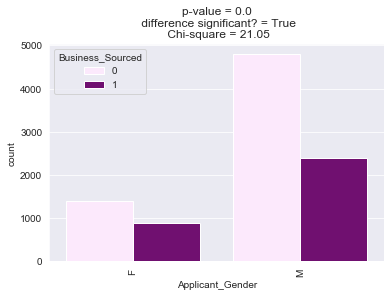

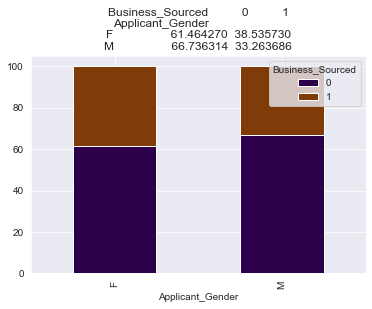

In [140]:
BVA_categorical_plot(data, 'Business_Sourced', 'Applicant_Gender')

***There is a significant diffrence between male and female applicants being recuited as agents. The number of female applicants is low but % of females becoming agents is higher tha males***

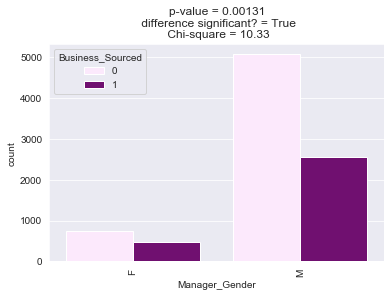

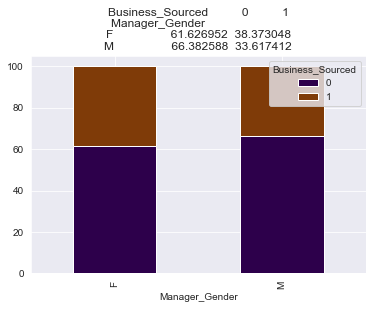

In [141]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Gender')

***There is a significant diffrence between male and female managers. Though The number of female managers is low but the % of females managers recuiting agents is higher than male managers***

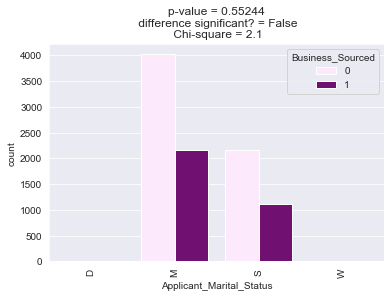

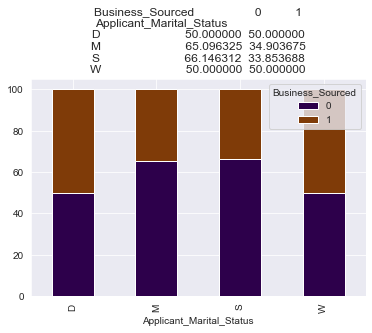

In [142]:
BVA_categorical_plot(data, 'Business_Sourced', 'Applicant_Marital_Status')

***There is no significant difference in marital status of the applicants. It doesn't affect in recuitment of agents***

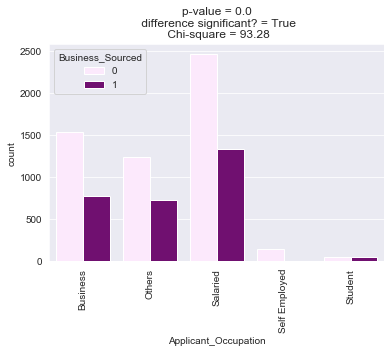

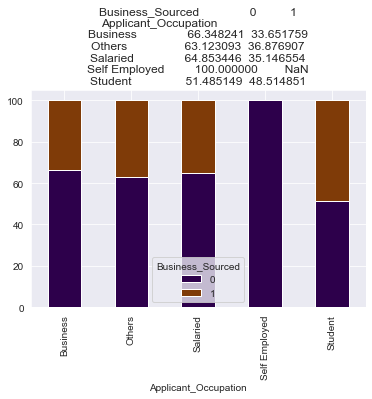

In [143]:
BVA_categorical_plot(data, 'Business_Sourced', 'Applicant_Occupation')

***There is a significant difference between applicants occupation. We have maximum applicants from salaried class but most of the applicants who are becoming agents are students (48%). Self employed applicants are not becoming agents***

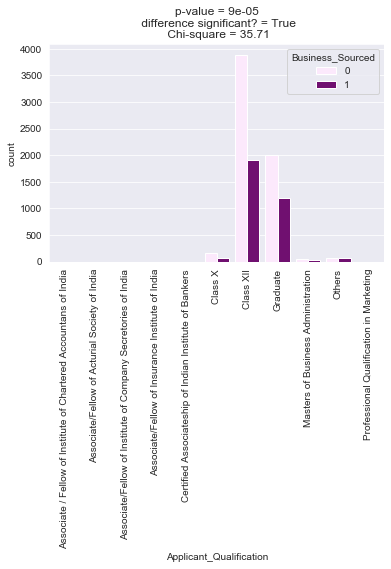

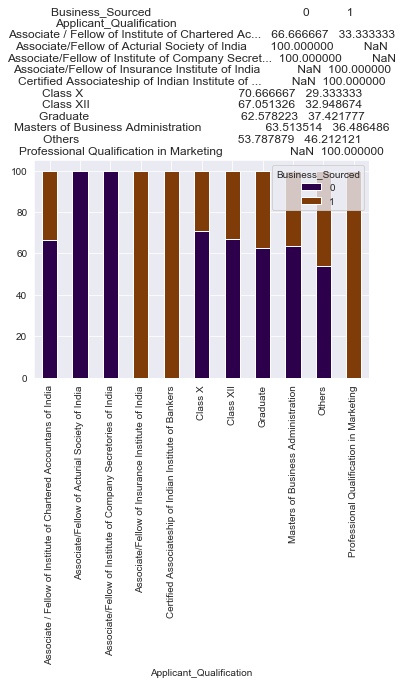

In [144]:
BVA_categorical_plot(data, 'Business_Sourced', 'Applicant_Qualification')

***There is a significant difference in applicants qualifications. The applicants that are coming are mostly either 12th pass or graduated. There are hardly 1 or 2 applicants that have associateship or fellowship from Finance Institute.***
***Those 1 or 2 applicants having professional qualification in finance and assiociateship or fellowship in Insurance and Banking are 100% being recuited as agents.***

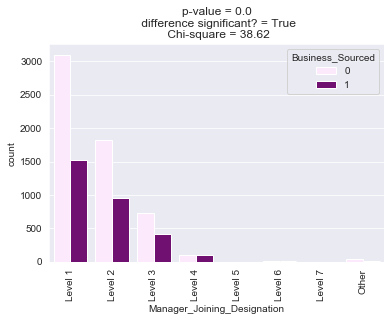

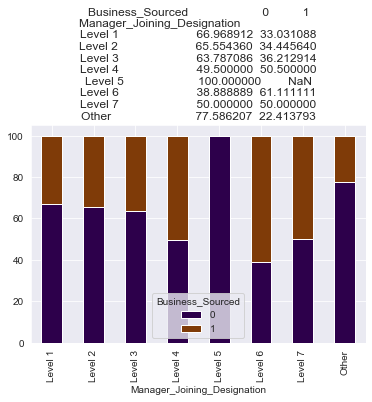

In [145]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Joining_Designation')

***There is a significant difference in managers joining designation. Most of the managers joined at lower level(1,2,3), very few employees joined at higher level(5,6,7). Managers who has joined at Level 6 and 4 select maximum number of agents***

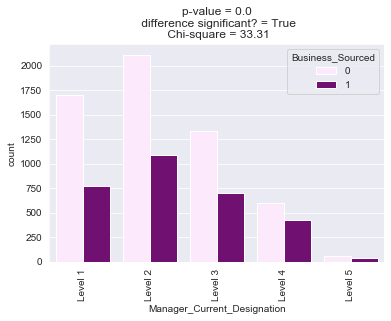

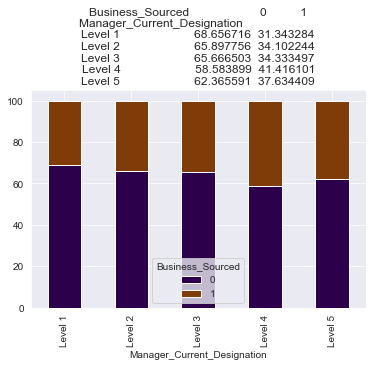

In [147]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Current_Designation')

***There is a significant difference in managers current designation. Though the number of managers in level 2 is high but maximum number of agents are recuited by Level 3 manager***

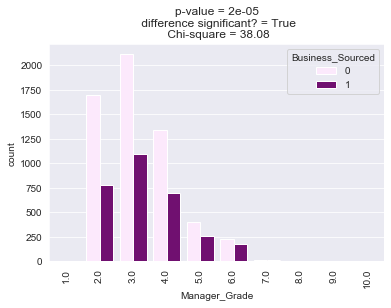

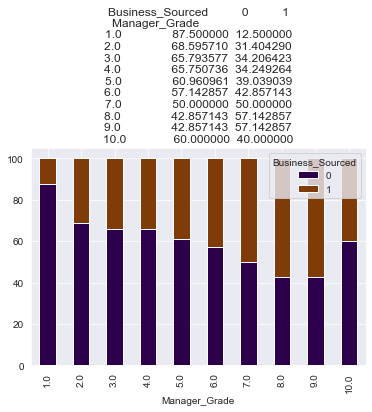

In [146]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Grade')

***as the grade increses the agents also increses***

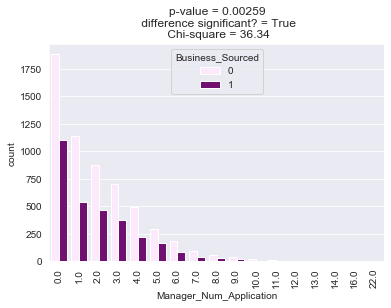

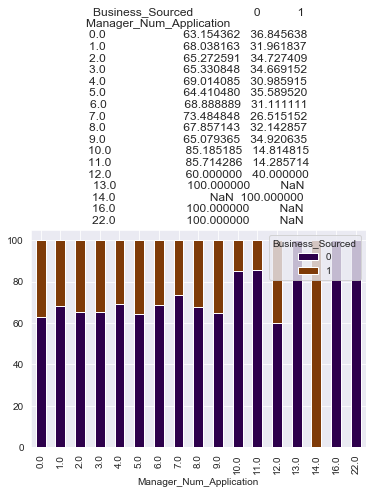

In [149]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Num_Application')

***There is a significant difference in managers grade. Maximum number of employees are in lower grade. But we can observe that as the grade increases the % of agent recuitment also increases***

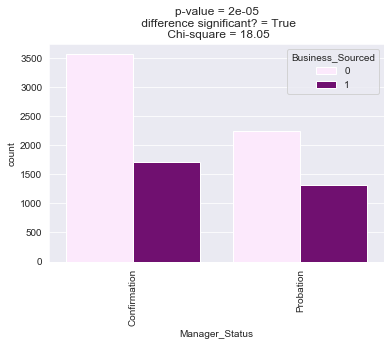

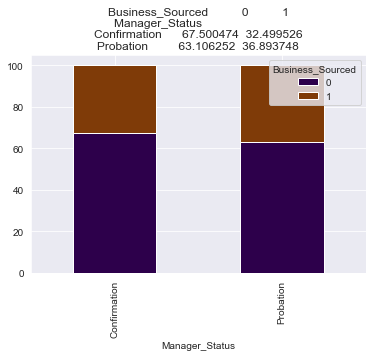

In [150]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Status')

***There are very few managers who have recently joined and are on probation period. But managers who are on probation period are recuiting more agents than confirmed employees***

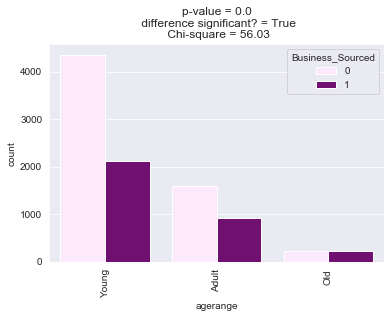

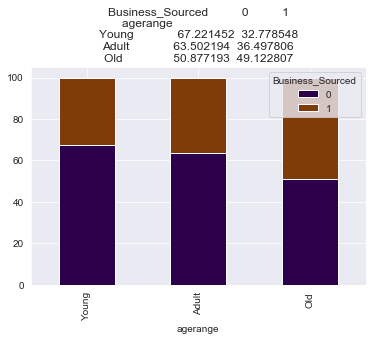

In [151]:
BVA_categorical_plot(data, 'Business_Sourced', 'agerange')

***There is a significant difference between the applicants age. Though the number of applicants who are younger is high but older applicants are being recuited as agents more than younger applicants***

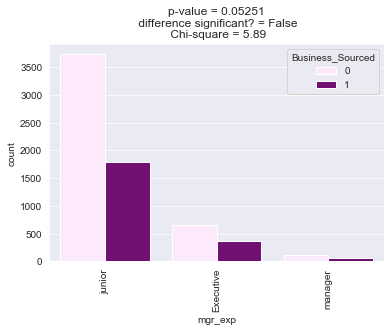

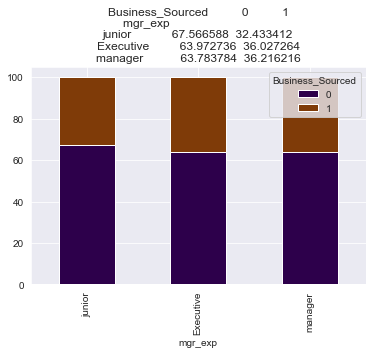

In [152]:
BVA_categorical_plot(data, 'Business_Sourced', 'mgr_exp')

***mostly executives and managers are getting more agents***

In [221]:
# getting city codes which have less than 60 (2%) of accounts
tmp = data['Applicant_City_PIN'].value_counts()[:]
cities = tmp[tmp<60].index

business_agents = data[['Business_Sourced','Applicant_City_PIN']][:]
business_agents['city_cat'] = None
business_agents['city_cat'][business_agents['Applicant_City_PIN'].isin(cities[:])] = 'low applicants'
business_agents['city_cat'][~business_agents['Applicant_City_PIN'].isin(cities[:])] = 'high applicants'

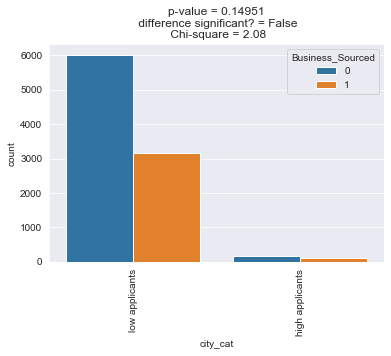

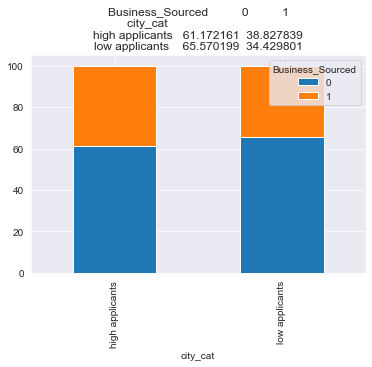

In [222]:
BVA_categorical_plot(business_agents, 'Business_Sourced', 'city_cat')

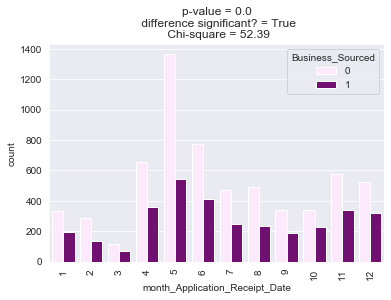

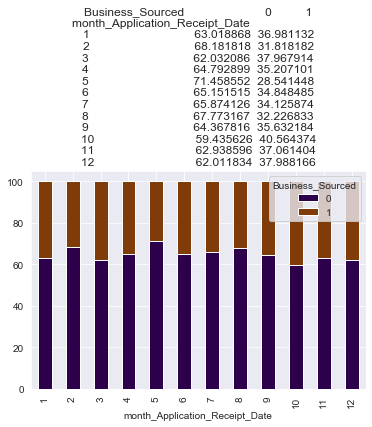

In [153]:
BVA_categorical_plot(data, 'Business_Sourced', 'month_Application_Receipt_Date')

***Maximum number of application were filled in the month of May but applicants who has submitted their applications in the month of october were recuited***

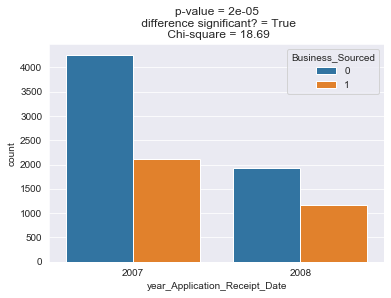

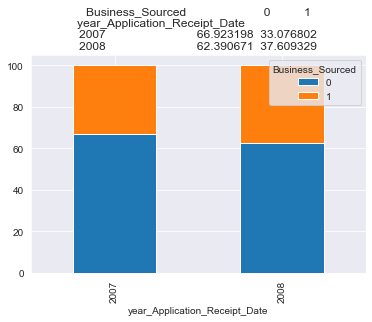

In [171]:
BVA_categorical_plot(data, 'Business_Sourced', 'year_Application_Receipt_Date')

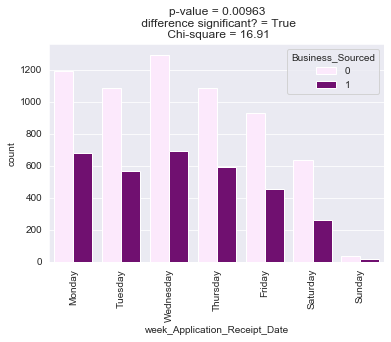

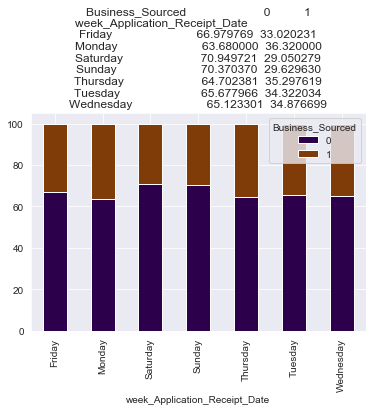

In [154]:
BVA_categorical_plot(data, 'Business_Sourced', 'week_Application_Receipt_Date')

***Maximum applicants were filled on Wednesday but agents were recuited more when application were filled on Monday***

In [160]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2],color='purple')
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data,color='purple')
  plt.title('categorical boxplot')

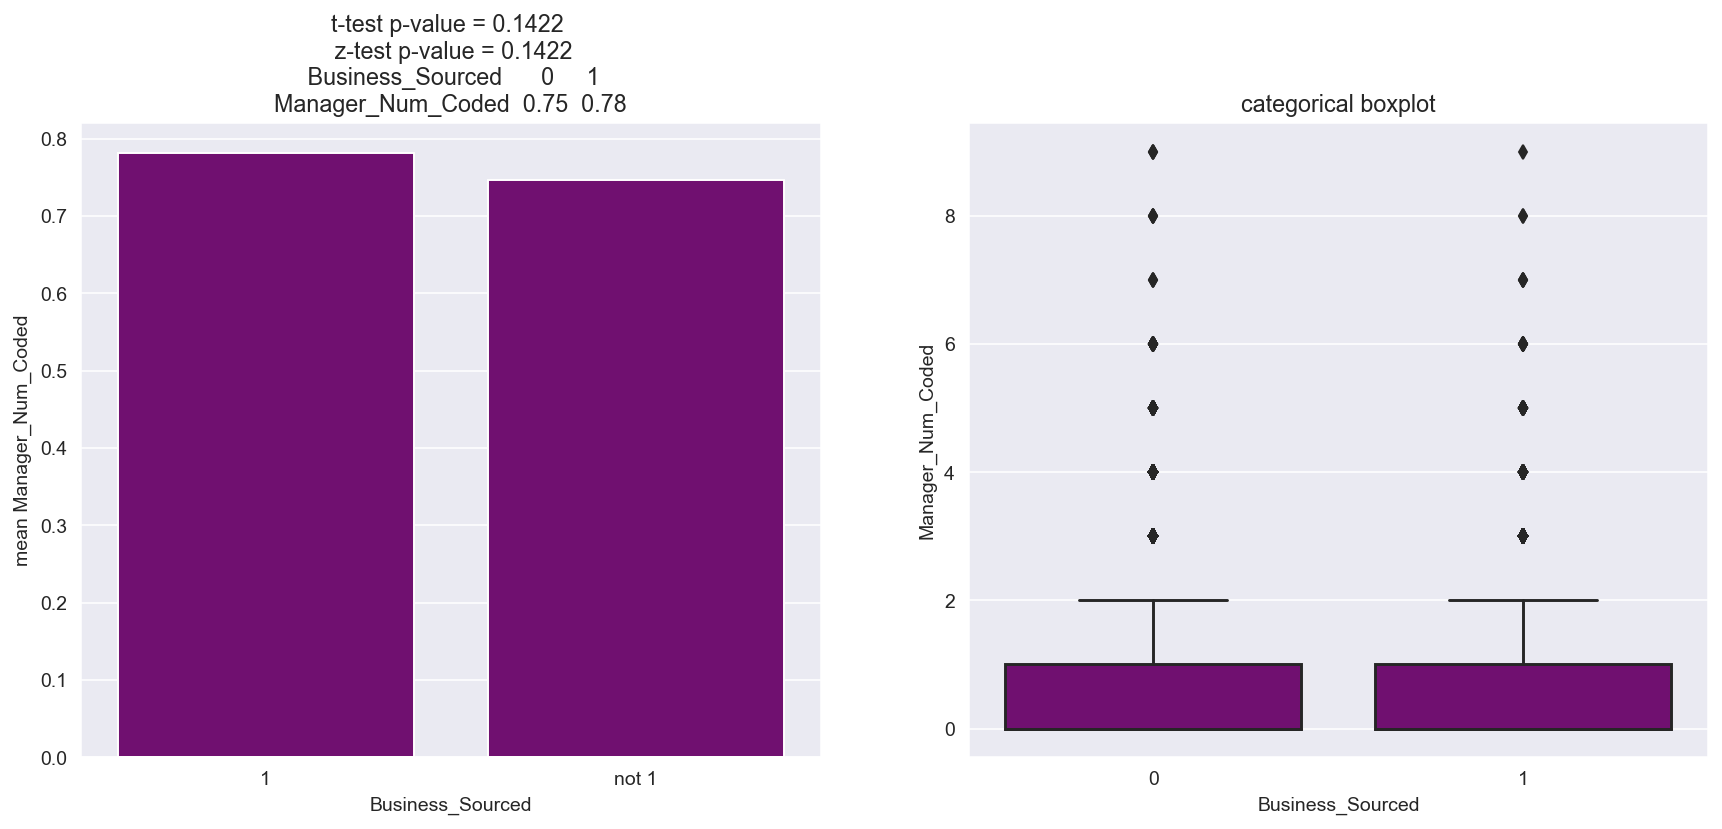

In [161]:
Bivariate_cont_cat(data, 'Manager_Num_Coded', 'Business_Sourced', 1)

***There is no significnt difference between the managers who have recruited agents and who han't recruited agents in last 3 months. We reject null hypothesis***

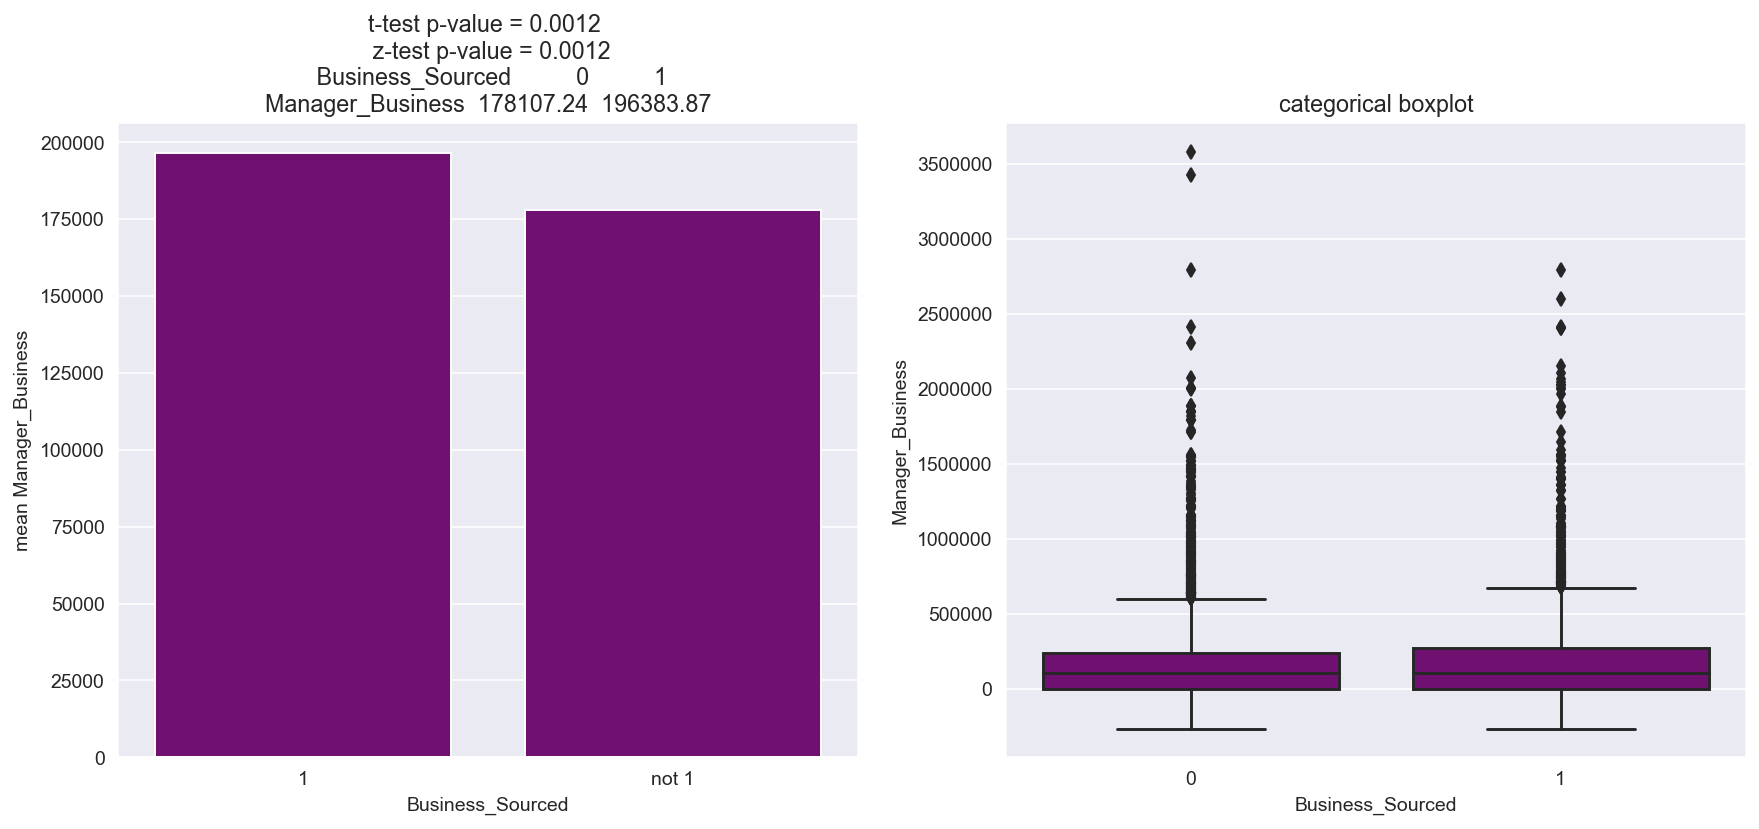

In [162]:
Bivariate_cont_cat(data, 'Manager_Business', 'Business_Sourced', 1)

***There is a significant difference between manager business of agents and non agents. The manager business of agents is higher than non agents***

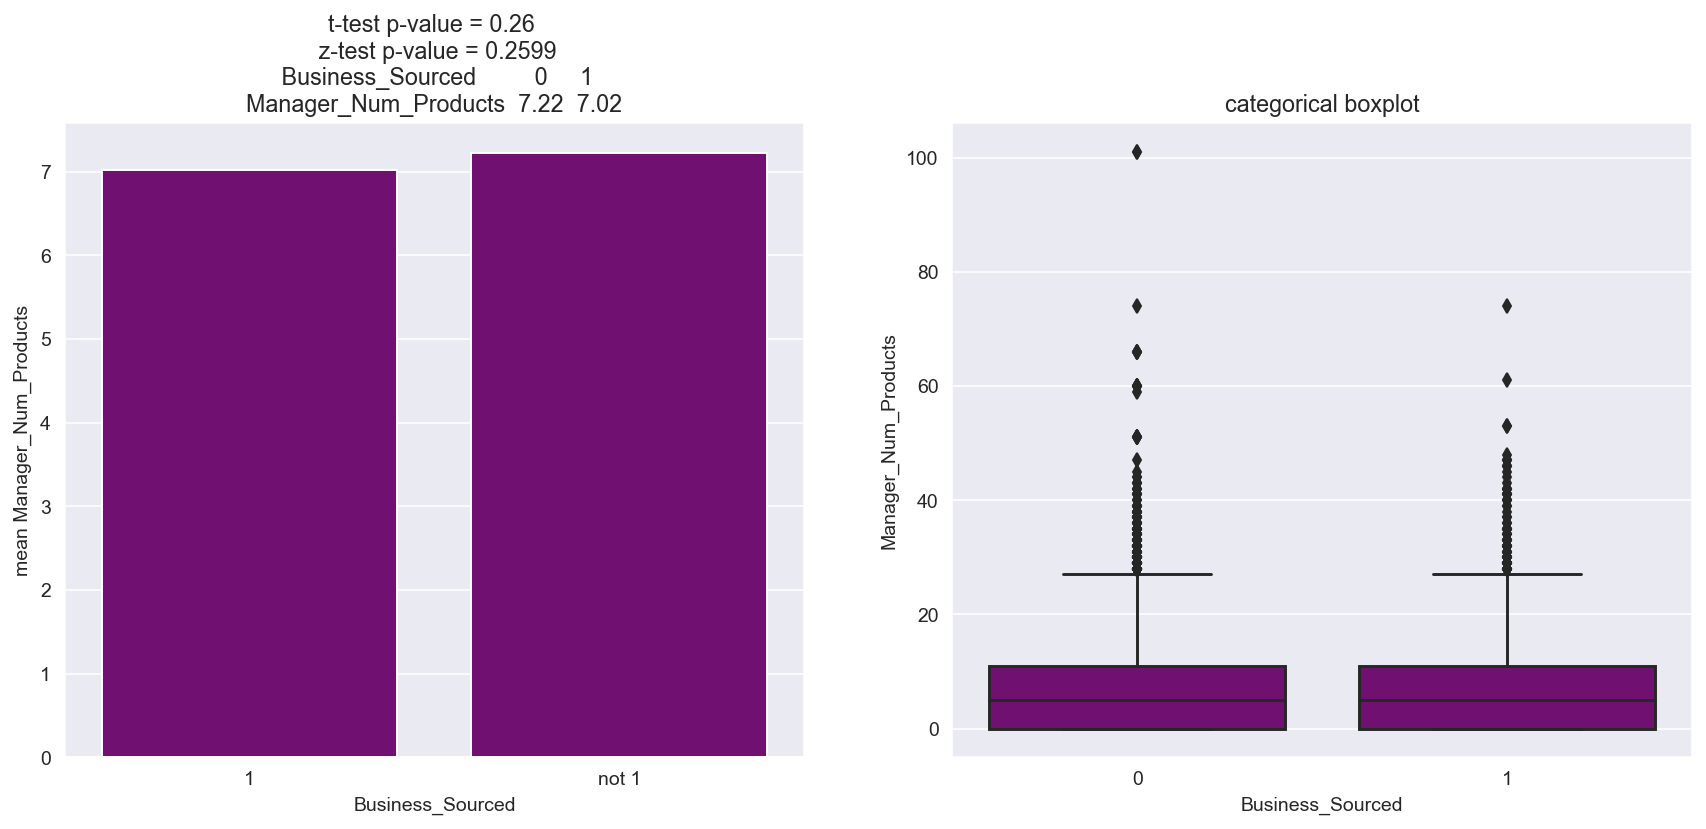

In [163]:
Bivariate_cont_cat(data, 'Manager_Num_Products', 'Business_Sourced', 1)

***There is no significant difference betwwen manager products of agents and non agents. We reject null hypothesis***

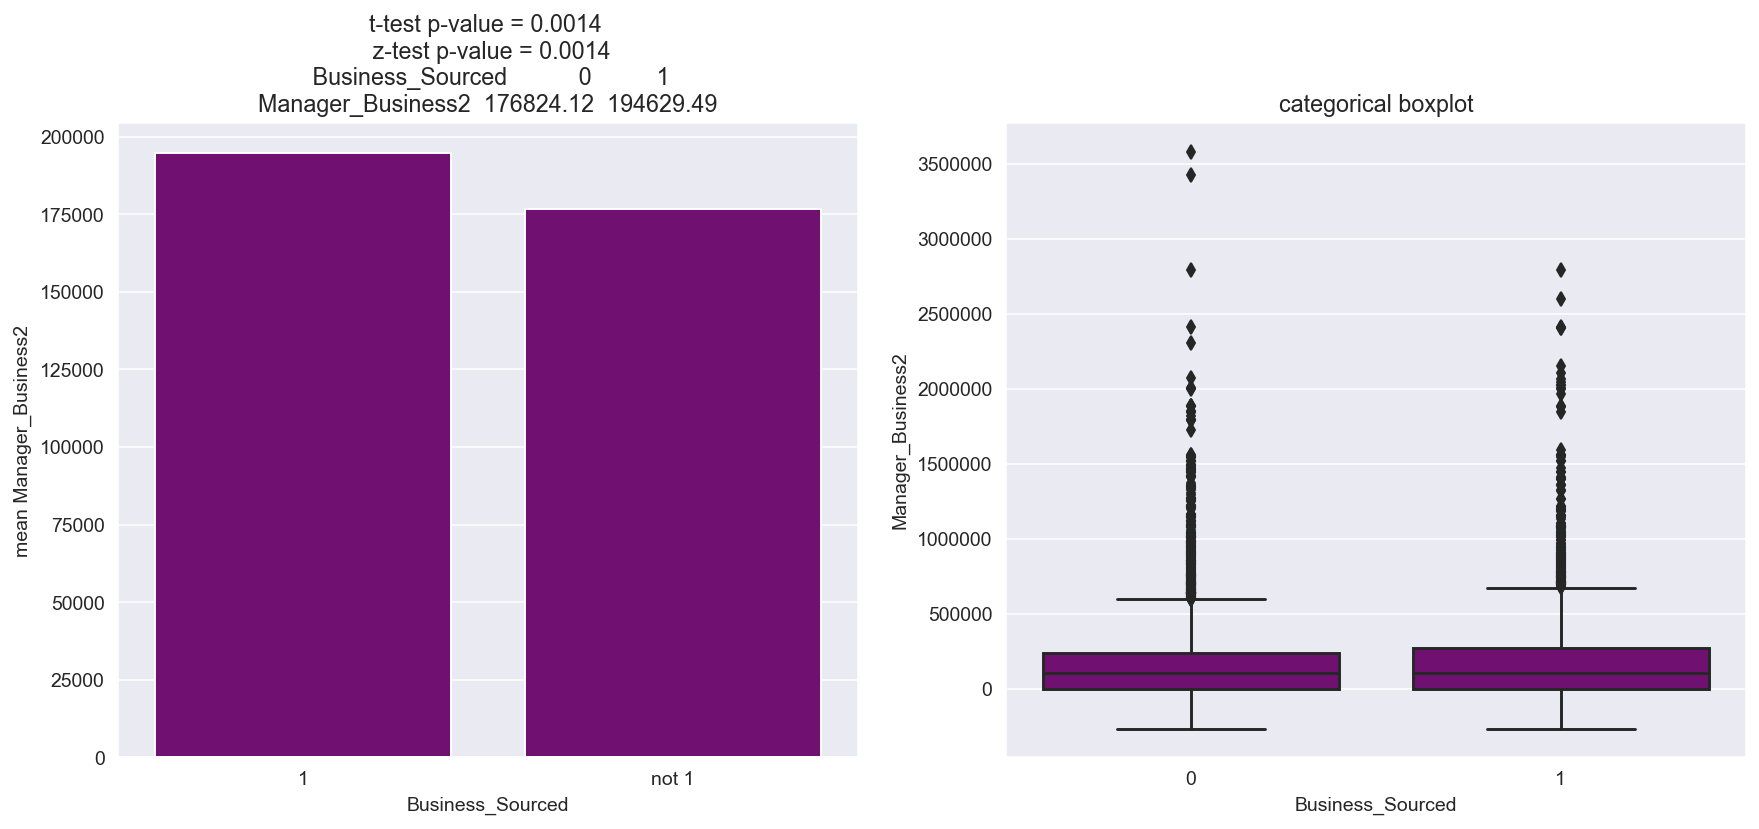

In [164]:
Bivariate_cont_cat(data, 'Manager_Business2', 'Business_Sourced', 1)

***There is a significant difference between manager business2 of agents and non agents. The manager business of agents is higher than non agents***

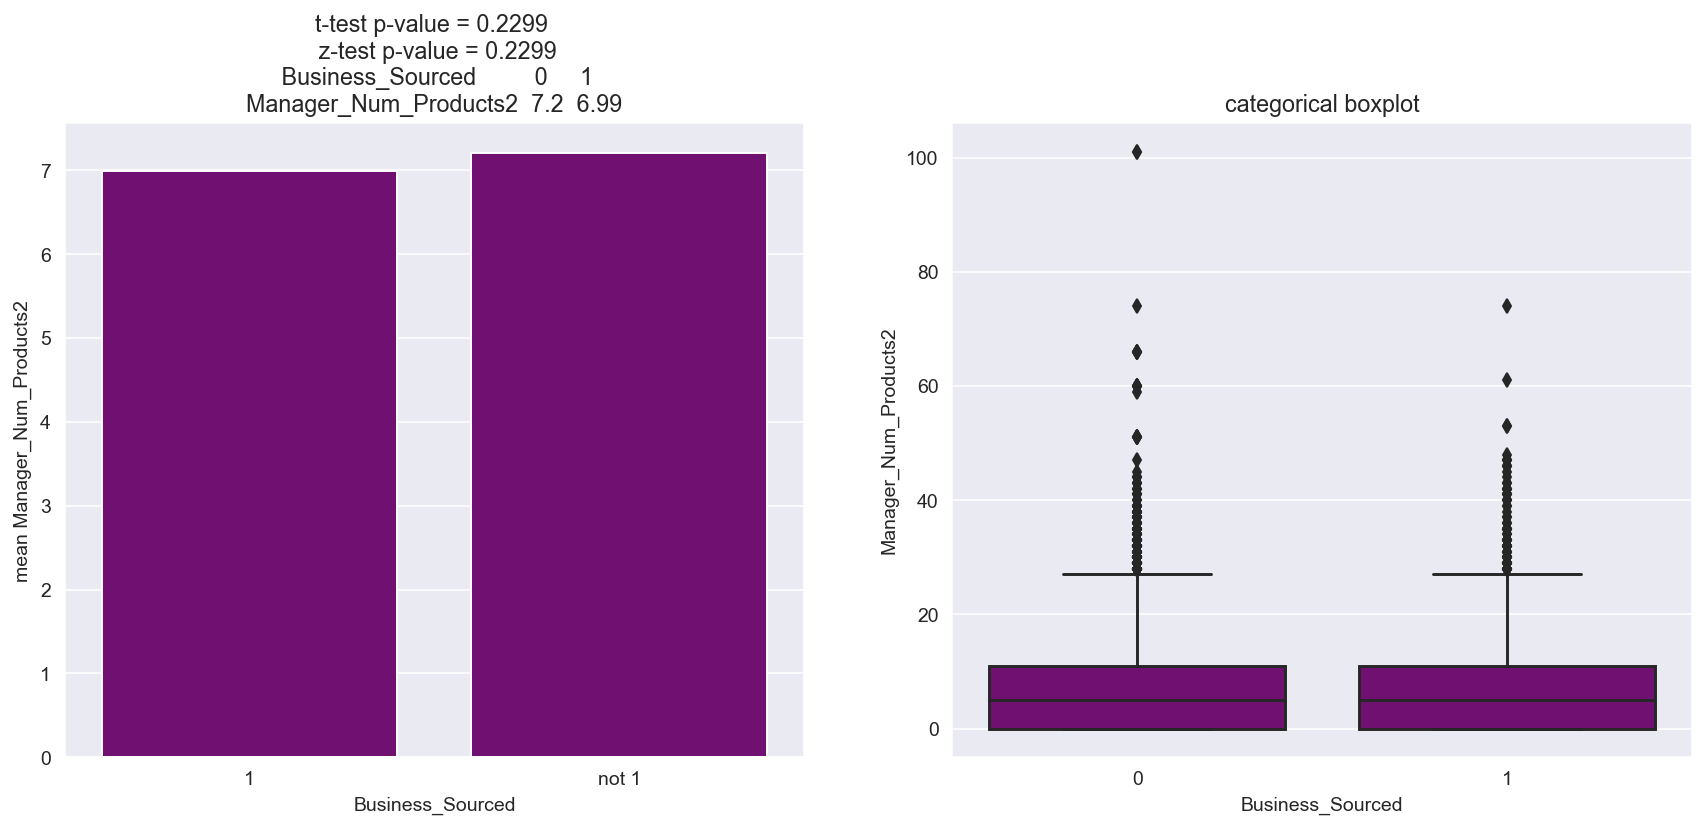

In [165]:
Bivariate_cont_cat(data, 'Manager_Num_Products2', 'Business_Sourced', 1)

***There is no significant difference betwwen manager products of agents and non agents. We reject null hypothesis***

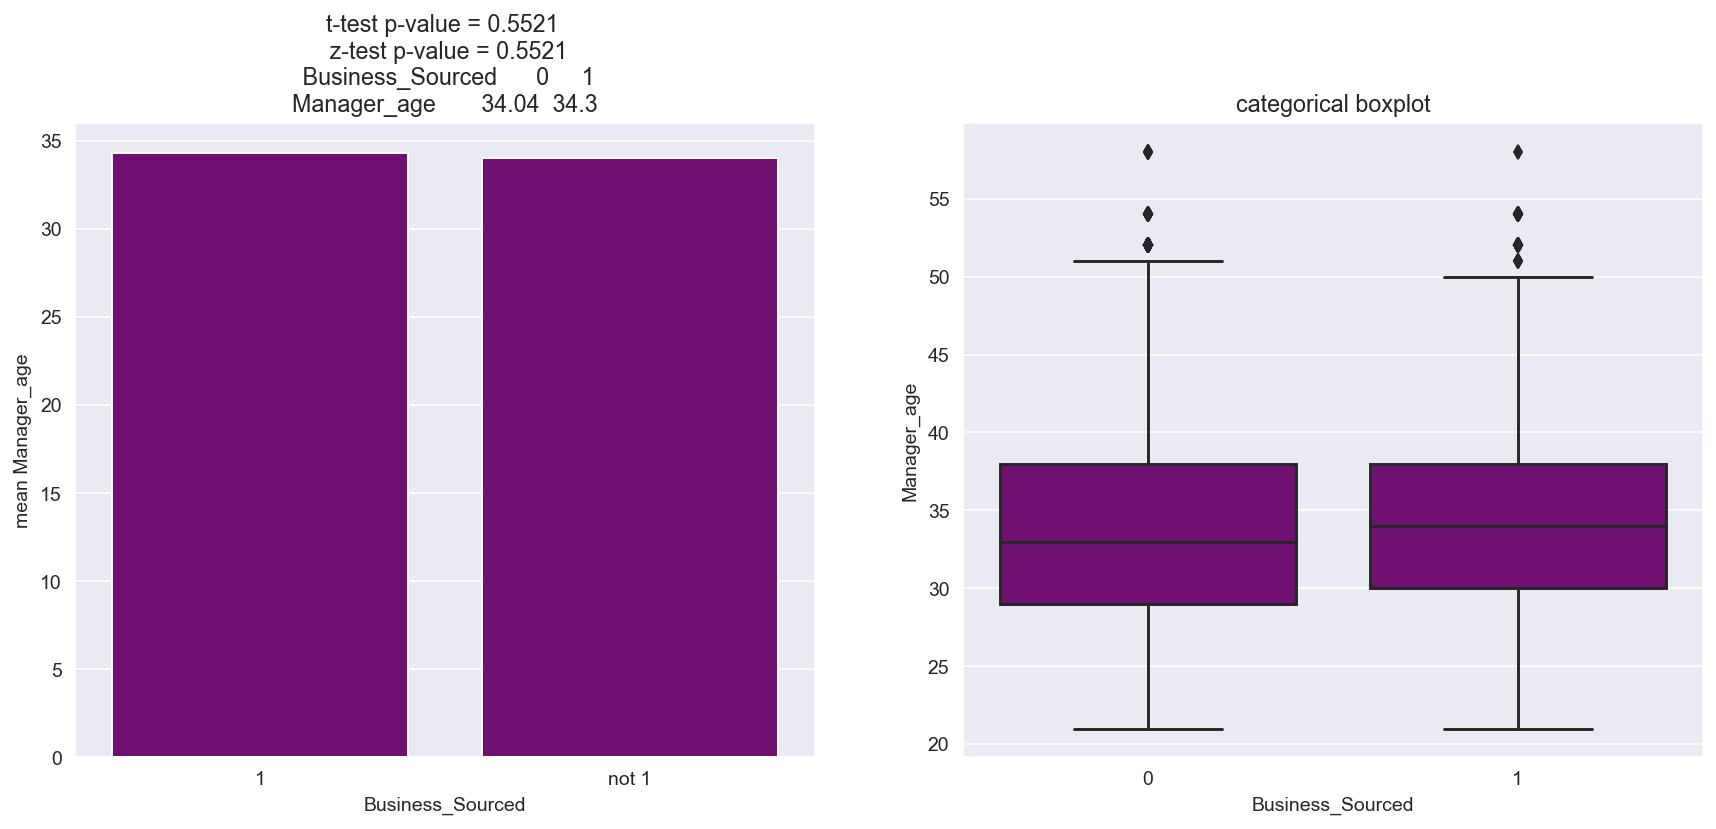

In [166]:
Bivariate_cont_cat(data, 'Manager_age', 'Business_Sourced', 1)

***There is no significant difference betwwen manager's age who recuits agents and who doesn't agents. We reject null hypothesis***

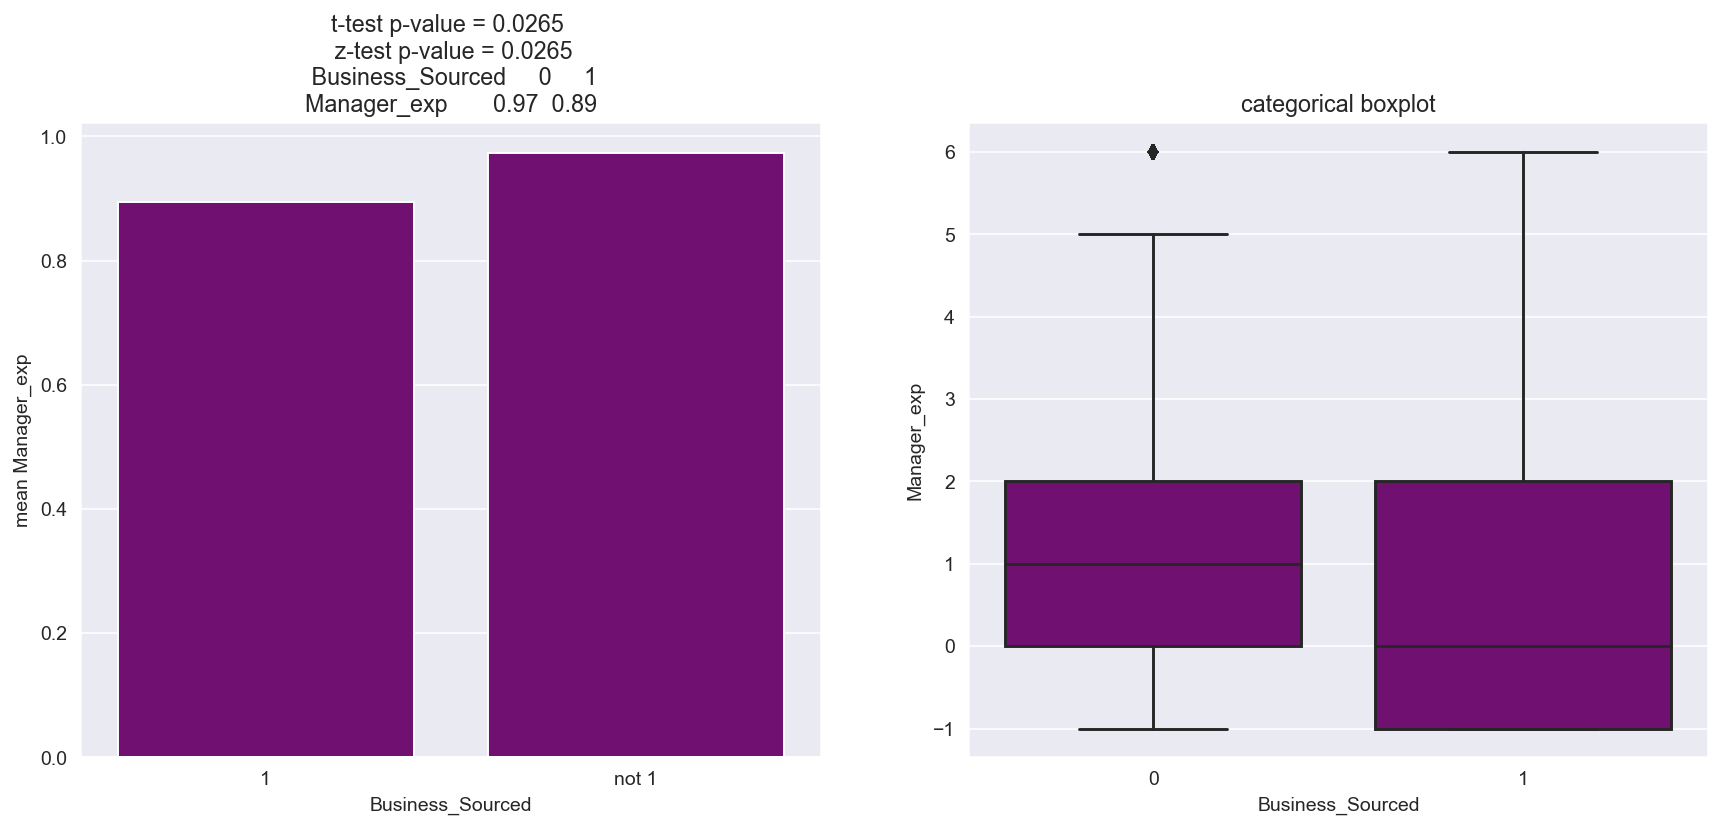

In [167]:
Bivariate_cont_cat(data, 'Manager_exp', 'Business_Sourced', 1)

***There is significant difference betwwen manager's experience who recuits agents and who doesn't recuit agents.***

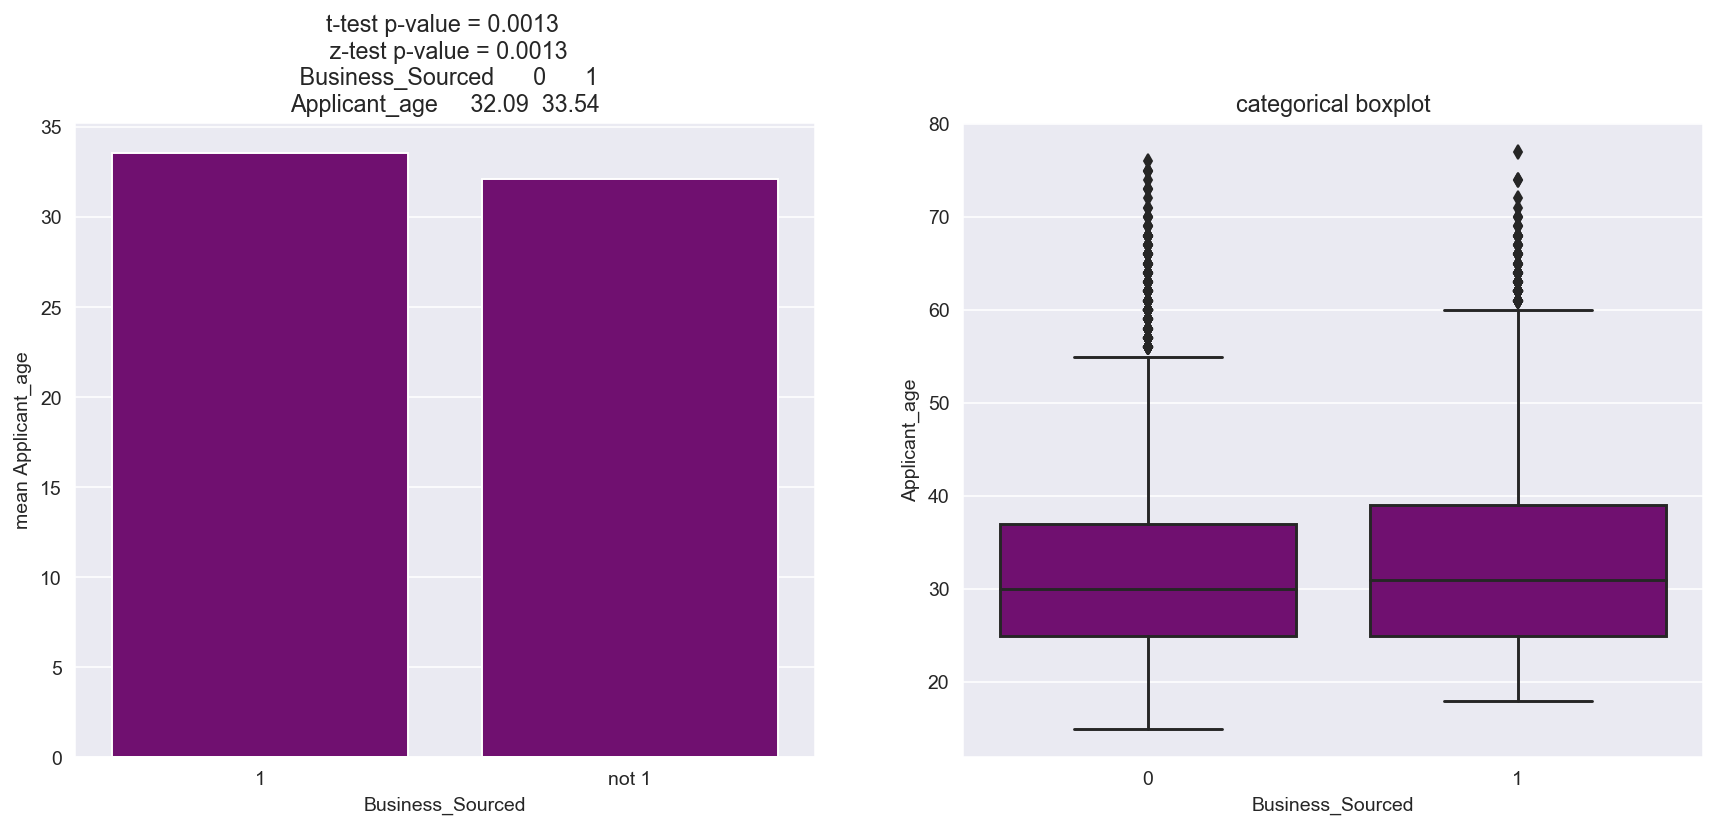

In [169]:
Bivariate_cont_cat(data, 'Applicant_age', 'Business_Sourced', 1)

***There is significant difference between applicants' age who are recuited as agents and who are not recuited as agents. We reject null hypothesis***

In [188]:
data['Target_variable'] = 0
data['Target_variable'][(data['Business_Sourced']== 'Business_Sourced')] = 1
data['Target_variable'][(data['Business_Sourced']!= 'Business_Sourced')] = 0

In [189]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'agerange'], 
                 'Applicant_Occupation', aggfunc='count')

Applicant_Occupation       Business  Others  Salaried  Self Employed  Student
Applicant_Gender agerange                                                    
F                Young        235.0   378.0     693.0           18.0     38.0
                 Adult        101.0   183.0     264.0            7.0      1.0
                 Old            7.0    24.0      35.0            1.0      1.0
M                Young       1314.0   927.0    1990.0           80.0     60.0
                 Adult        604.0   344.0     635.0           42.0      1.0
                 Old           40.0   106.0     169.0            1.0      NaN

In [190]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'agerange'], 
                 'Applicant_Qualification', aggfunc='count')

Applicant_Qualification    Associate / Fellow of Institute of Chartered Accountans of India  \
Applicant_Gender agerange                                                                     
F                Young                                                   NaN                  
                 Adult                                                   NaN                  
                 Old                                                     NaN                  
M                Young                                                   1.0                  
                 Adult                                                   1.0                  
                 Old                                                     1.0                  

Applicant_Qualification    Associate/Fellow of Acturial Society of India  \
Applicant_Gender agerange                                                  
F                Young                                               NaN   
                 Adult                                               NaN   
                 Old                                                 NaN   
M                Young                                               1.0   
                 Adult                                               NaN   
                 Old                                                 NaN   

Applicant_Qualification    Associate/Fellow of Institute of Company Secretories of India  \
Applicant_Gender agerange                                                                  
F                Young                                                   NaN               
                 Adult                                                   NaN               
                 Old                                                     NaN               
M                Young                                                   NaN               
                 Adult                                                   NaN               
                 Old                                                     1.0               

Applicant_Qualification    Associate/Fellow of Insurance Institute of India  \
Applicant_Gender agerange                                                     
F                Young                                                  NaN   
                 Adult                                                  NaN   
                 Old                                                    NaN   
M                Young                                                  1.0   
                 Adult                                                  NaN   
                 Old                                                    NaN   

Applicant_Qualification    Certified Associateship of Indian Institute of Bankers  \
Applicant_Gender agerange                                                           
F                Young                                                   1.0        
                 Adult                                                   NaN        
                 Old                                                     NaN        
M                Young                                                   NaN        
                 Adult                                                   NaN        
                 Old                                                     NaN        

Applicant_Qualification    Class X  Class XII  Graduate  \
Applicant_Gender agerange                                 
F                Young        17.0      943.0     549.0   
                 Adult         7.0      334.0     285.0   
                 Old           NaN       26.0      58.0   
M                Young       135.0     3171.0    1505.0   
                 Adult        61.0     1161.0     609.0   
                 Old           5.0      171.0     181.0   

Applicant_Qualification    Masters of Business Administration  Others  \
Applicant_Gender agerange        

In [191]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Qualification'], 
                'Applicant_Occupation' , aggfunc='count')

Applicant_Occupation                                                 Business  \
Applicant_Gender Applicant_Qualification                                        
F                Certified Associateship of Indian Institute of ...       NaN   
                 Class X                                                  4.0   
                 Class XII                                              233.0   
                 Graduate                                               105.0   
                 Masters of Business Administration                       NaN   
                 Others                                                   1.0   
                 Professional Qualification in Marketing                  NaN   
M                Associate / Fellow of Institute of Chartered Ac...       2.0   
                 Associate/Fellow of Acturial Society of India            NaN   
                 Associate/Fellow of Institute of Company Secret...       NaN   
                 Associate/Fellow of Insurance Institute of India         NaN   
                 Class X                                                 70.0   
                 Class XII                                             1384.0   
                 Graduate                                               479.0   
                 Masters of Business Administration                      11.0   
                 Others                                                  14.0   

Applicant_Occupation                                                 Others  \
Applicant_Gender Applicant_Qualification                                      
F                Certified Associateship of Indian Institute of ...     1.0   
                 Class X                                                6.0   
                 Class XII                                            331.0   
                 Graduate                                             226.0   
                 Masters of Business Administration                     2.0   
                 Others                                                20.0   
                 Professional Qualification in Marketing                1.0   
M                Associate / Fellow of Institute of Chartered Ac...     NaN   
                 Associate/Fellow of Acturial Society of India          NaN   
                 Associate/Fellow of Institute of Company Secret...     NaN   
                 Associate/Fellow of Insurance Institute of India       NaN   
                 Class X                                               50.0   
                 Class XII                                            966.0   
                 Graduate                                             328.0   
                 Masters of Business Administration                     8.0   
                 Others                                                26.0   

Applicant_Occupation                                                 Salaried  \
Applicant_Gender Applicant_Qualification                                        
F                Certified Associateship of Indian Institute of ...       NaN   
                 Class X                                                 11.0   
                 Class XII                                              641.0   
                 Graduate                                               319.0   
                 Masters of Business Administration                       6.0   
                 Others                                                  15.0   
                 Professional Qualification in Marketing                  NaN   
M                Associate / Fellow of Institute of Chartered Ac...       NaN   
                 Associate/Fellow of Acturial Society of India            1.0   
                 Associate/Fellow of Institute of Company Secret...       1.0   
                 Associate/Fellow of Insurance Institute of India         1.0   
                 Class X                                         

In [192]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'agerange'], 
                 'year_Application_Receipt_Date', aggfunc='count')

year_Application_Receipt_Date  2007  2008
Applicant_Gender agerange                
F                Young         1033   518
                 Adult          398   242
                 Old             44    44
M                Young         3416  1522
                 Adult         1241   626
                 Old            234   134

In [193]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Occupation'], 
                 'year_Application_Receipt_Date', aggfunc='count')

year_Application_Receipt_Date          2007  2008
Applicant_Gender Applicant_Occupation            
F                Business               283    60
                 Others                 339   248
                 Salaried               805   187
                 Self Employed           10    16
                 Student                 37     3
M                Business              1641   319
                 Others                1023   355
                 Salaried              2117   678
                 Self Employed           54    69
                 Student                 57     4

In [194]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Qualification'], 
                 'year_Application_Receipt_Date', aggfunc='count')

year_Application_Receipt_Date                                          2007  \
Applicant_Gender Applicant_Qualification                                      
F                Certified Associateship of Indian Institute of ...     NaN   
                 Class X                                               22.0   
                 Class XII                                           1121.0   
                 Graduate                                             331.0   
                 Masters of Business Administration                     1.0   
                 Others                                                 NaN   
                 Professional Qualification in Marketing                NaN   
M                Associate / Fellow of Institute of Chartered Ac...     1.0   
                 Associate/Fellow of Acturial Society of India          NaN   
                 Associate/Fellow of Institute of Company Secret...     1.0   
                 Associate/Fellow of Insurance Institute of India       NaN   
                 Class X                                              190.0   
                 Class XII                                           3830.0   
                 Graduate                                             859.0   
                 Masters of Business Administration                    10.0   
                 Others                                                 1.0   

year_Application_Receipt_Date                                          2008  
Applicant_Gender Applicant_Qualification                                     
F                Certified Associateship of Indian Institute of ...     1.0  
                 Class X                                                2.0  
                 Class XII                                            182.0  
                 Graduate                                             563.0  
                 Masters of Business Administration                    13.0  
                 Others                                                40.0  
                 Professional Qualification in Marketing                1.0  
M                Associate / Fellow of Institute of Chartered Ac...     2.0  
                 Associate/Fellow of Acturial Society of India          1.0  
                 Associate/Fellow of Institute of Company Secret...     NaN  
                 Associate/Fellow of Insurance Institute of India       1.0  
                 Class X                                               11.0  
                 Class XII                                            673.0  
                 Graduate                                            1442.0  
                 Masters of Business Administration                    50.0  
                 Others                                                91.0

In [195]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'agerange'], 
                  'month_Application_Receipt_Date', aggfunc='count')

month_Application_Receipt_Date   1    2   3    4     5    6    7    8    9   \
Applicant_Gender agerange                                                     
F                Young           95   71  42  154   277  218  118  112   94   
                 Adult           40   37  17   72   119   77   57   47   25   
                 Old              9    6   2    6    23    9    7    3    4   
M                Young          257  192  80  539  1019  622  366  399  282   
                 Adult           92   76  38  201   392  216  144  131   96   
                 Old             28   13   5   38    65   42   21   28   18   

month_Application_Receipt_Date   10   11   12  
Applicant_Gender agerange                      
F                Young           81  155  134  
                 Adult           39   54   56  
                 Old              5   10    4  
M                Young          268  455  459  
                 Adult          149  187  145  
                 Old             23   45   42

In [196]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Occupation'], 
                  'month_Application_Receipt_Date', aggfunc='count')

month_Application_Receipt_Date            1     2     3      4      5      6   \
Applicant_Gender Applicant_Occupation                                           
F                Business               18.0   8.0   5.0   30.0   63.0   37.0   
                 Others                 84.0  51.0  15.0   73.0  106.0   35.0   
                 Salaried               30.0  21.0  25.0   84.0  134.0  125.0   
                 Self Employed           7.0   2.0   1.0    2.0    8.0    3.0   
                 Student                 NaN   1.0   1.0    3.0    8.0    4.0   
M                Business               92.0  38.0  11.0  182.0  354.0  195.0   
                 Others                122.0  39.0  15.0  199.0  273.0   67.0   
                 Salaried              108.0  77.0  70.0  251.0  507.0  336.0   
                 Self Employed          28.0   4.0   NaN   24.0   30.0   20.0   
                 Student                 2.0   NaN   NaN    5.0    7.0    7.0   

month_Application_Receipt_Date            7      8      9      10     11  \
Applicant_Gender Applicant_Occupation                                      
F                Business               32.0   27.0   22.0   24.0   32.0   
                 Others                 28.0   43.0   41.0   41.0   49.0   
                 Salaried              117.0   84.0   58.0   59.0  133.0   
                 Self Employed           NaN    3.0    NaN    NaN    NaN   
                 Student                 4.0    5.0    2.0    1.0    5.0   
M                Business              194.0  187.0  127.0  132.0  216.0   
                 Others                 44.0  137.0  107.0  151.0  167.0   
                 Salaried              278.0  214.0  157.0  151.0  296.0   
                 Self Employed           6.0   11.0    NaN    NaN    NaN   
                 Student                 5.0    9.0    5.0    6.0    8.0   

month_Application_Receipt_Date            12  
Applicant_Gender Applicant_Occupation         
F                Business               45.0  
                 Others                 21.0  
                 Salaried              122.0  
                 Self Employed           NaN  
                 Student                 6.0  
M                Business              232.0  
                 Others                 57.0  
                 Salaried              350.0  
                 Self Employed           NaN  
                 Student                 7.0

In [197]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Qualification'], 
                  'month_Application_Receipt_Date', aggfunc='count')

month_Application_Receipt_Date                                          1   \
Applicant_Gender Applicant_Qualification                                     
F                Certified Associateship of Indian Institute of ...    NaN   
                 Class X                                               1.0   
                 Class XII                                            38.0   
                 Graduate                                             96.0   
                 Masters of Business Administration                    1.0   
                 Others                                                8.0   
                 Professional Qualification in Marketing               NaN   
M                Associate / Fellow of Institute of Chartered Ac...    2.0   
                 Associate/Fellow of Acturial Society of India         NaN   
                 Associate/Fellow of Institute of Company Secret...    NaN   
                 Associate/Fellow of Insurance Institute of India      NaN   
                 Class X                                               2.0   
                 Class XII                                           143.0   
                 Graduate                                            200.0   
                 Masters of Business Administration                    6.0   
                 Others                                               22.0   

month_Application_Receipt_Date                                          2   \
Applicant_Gender Applicant_Qualification                                     
F                Certified Associateship of Indian Institute of ...    NaN   
                 Class X                                               NaN   
                 Class XII                                            24.0   
                 Graduate                                             81.0   
                 Masters of Business Administration                    2.0   
                 Others                                                7.0   
                 Professional Qualification in Marketing               NaN   
M                Associate / Fellow of Institute of Chartered Ac...    NaN   
                 Associate/Fellow of Acturial Society of India         NaN   
                 Associate/Fellow of Institute of Company Secret...    NaN   
                 Associate/Fellow of Insurance Institute of India      1.0   
                 Class X                                               4.0   
                 Class XII                                            93.0   
                 Graduate                                            165.0   
                 Masters of Business Administration                    7.0   
                 Others                                                9.0   

month_Application_Receipt_Date                                         3   \
Applicant_Gender Applicant_Qualification                                    
F                Certified Associateship of Indian Institute of ...   NaN   
                 Class X                                              1.0   
                 Class XII                                           25.0   
                 Graduate                                            32.0   
                 Masters of Business Administration                   1.0   
                 Others                                               2.0   
                 Professional Qualification in Marketing              NaN   
M                Associate / Fellow of Institute of Chartered Ac...   NaN   
                 Associate/Fellow of Acturial Society of India        NaN   
                 Associate/Fellow of Institute of Company Secret...   NaN   
                 Associate/Fellow of Insurance Institute of India     NaN   
                 Class X                                              1.0   
                 Class XII                                           44.0   
                 Graduate          

In [198]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'agerange'], 
                 'week_Application_Receipt_Date', aggfunc='count')

week_Application_Receipt_Date  Friday  Monday  Saturday  Sunday  Thursday  \
Applicant_Gender agerange                                                   
F                Young          232.0   313.0     134.0     7.0     297.0   
                 Adult           90.0   129.0      59.0     1.0     117.0   
                 Old             14.0    23.0       7.0     NaN      17.0   
M                Young          714.0   990.0     471.0    32.0     824.0   
                 Adult          264.0   355.0     182.0    12.0     335.0   
                 Old             59.0    49.0      29.0     2.0      80.0   

week_Application_Receipt_Date  Tuesday  Wednesday  
Applicant_Gender agerange                          
F                Young           252.0      316.0  
                 Adult           110.0      134.0  
                 Old              14.0       13.0  
M                Young           872.0     1035.0  
                 Adult           332.0      387.0  
                 Old              60.0       89.0

In [199]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Occupation'], 
                 'week_Application_Receipt_Date', aggfunc='count')

week_Application_Receipt_Date          Friday  Monday  Saturday  Sunday  \
Applicant_Gender Applicant_Occupation                                     
F                Business                46.0    71.0      39.0     1.0   
                 Others                  87.0   116.0      58.0     3.0   
                 Salaried               144.0   202.0      85.0     4.0   
                 Self Employed            4.0     5.0       3.0     NaN   
                 Student                  7.0     6.0       1.0     NaN   
M                Business               278.0   406.0     203.0    19.0   
                 Others                 231.0   251.0     150.0     1.0   
                 Salaried               376.0   554.0     263.0    19.0   
                 Self Employed           11.0    20.0      15.0     2.0   
                 Student                 10.0    14.0       5.0     1.0   

week_Application_Receipt_Date          Thursday  Tuesday  Wednesday  
Applicant_Gender Applicant_Occupation                                
F                Business                  66.0     48.0       72.0  
                 Others                   108.0     99.0      116.0  
                 Salaried                 204.0    164.0      189.0  
                 Self Employed              7.0      2.0        5.0  
                 Student                   14.0      3.0        9.0  
M                Business                 332.0    326.0      396.0  
                 Others                   207.0    227.0      311.0  
                 Salaried                 530.0    480.0      573.0  
                 Self Employed             17.0     25.0       33.0  
                 Student                   14.0      7.0       10.0

In [200]:
data.pivot_table('Target_variable', ['Applicant_Gender', 'Applicant_Qualification'], 
                 'week_Application_Receipt_Date', aggfunc='count')

week_Application_Receipt_Date                                        Friday  \
Applicant_Gender Applicant_Qualification                                      
F                Certified Associateship of Indian Institute of ...     NaN   
                 Class X                                                2.0   
                 Class XII                                            189.0   
                 Graduate                                             131.0   
                 Masters of Business Administration                     4.0   
                 Others                                                 8.0   
                 Professional Qualification in Marketing                1.0   
M                Associate / Fellow of Institute of Chartered Ac...     NaN   
                 Associate/Fellow of Acturial Society of India          NaN   
                 Associate/Fellow of Institute of Company Secret...     NaN   
                 Associate/Fellow of Insurance Institute of India       NaN   
                 Class X                                               33.0   
                 Class XII                                            633.0   
                 Graduate                                             343.0   
                 Masters of Business Administration                     7.0   
                 Others                                                19.0   

week_Application_Receipt_Date                                        Monday  \
Applicant_Gender Applicant_Qualification                                      
F                Certified Associateship of Indian Institute of ...     NaN   
                 Class X                                                5.0   
                 Class XII                                            260.0   
                 Graduate                                             186.0   
                 Masters of Business Administration                     3.0   
                 Others                                                11.0   
                 Professional Qualification in Marketing                NaN   
M                Associate / Fellow of Institute of Chartered Ac...     1.0   
                 Associate/Fellow of Acturial Society of India          NaN   
                 Associate/Fellow of Institute of Company Secret...     NaN   
                 Associate/Fellow of Insurance Institute of India       1.0   
                 Class X                                               30.0   
                 Class XII                                            860.0   
                 Graduate                                             462.0   
                 Masters of Business Administration                    14.0   
                 Others                                                25.0   

week_Application_Receipt_Date                                        Saturday  \
Applicant_Gender Applicant_Qualification                                        
F                Certified Associateship of Indian Institute of ...       NaN   
                 Class X                                                  4.0   
                 Class XII                                              124.0   
                 Graduate                                                68.0   
                 Masters of Business Administration                       NaN   
                 Others                                                   3.0   
                 Professional Qualification in Marketing                  NaN   
M                Associate / Fellow of Institute of Chartered Ac...       NaN   
                 Associate/Fellow of Acturial Society of India            NaN   
                 Associate/Fellow of Institute of Company Secret...       1.0   
                 Associate/Fellow of Insurance Institute of India         NaN   
                 Class X                                                 28.0   
                 Cla

In [203]:
data.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced', 'date_Application_Receipt_Date',
       'month_Application_Receipt_Date', 'week_Application_Receipt_Date',
       'year_Application_Receipt_Date', 'Applicant_age', 'Manager_exp',
       'Manager_age', 'agerange', 'mgr_exp', 'mgr_age', 'Target_variable'],
      dtype='object')

In [207]:
data.pivot_table('Target_variable', ['Manager_Gender','Manager_Joining_Designation' ], 
                 ['mgr_exp','Manager_Status' ], aggfunc='count')

mgr_exp                                          junior            \
Manager_Status                             Confirmation Probation   
Manager_Gender Manager_Joining_Designation                          
F              Level 1                            406.0      94.0   
               Level 2                             79.0      45.0   
               Level 3                             12.0      45.0   
               Level 4                              5.0       9.0   
M              Level 1                           2389.0     524.0   
               Level 2                            752.0     527.0   
               Level 3                            116.0     291.0   
               Level 4                             43.0     115.0   
               Level 5                              1.0       NaN   
               Level 6                             18.0       NaN   
               Level 7                              2.0       NaN   
               Other                               44.0       2.0   

mgr_exp                                       Executive      manager  
Manager_Status                             Confirmation Confirmation  
Manager_Gender Manager_Joining_Designation                            
F              Level 1                              7.0         21.0  
               Level 2                             85.0         31.0  
               Level 3                              NaN          NaN  
               Level 4                              NaN          NaN  
M              Level 1                            486.0         13.0  
               Level 2                            434.0        100.0  
               Level 3                             15.0          8.0  
               Level 4                              NaN          NaN  
               Level 5                              NaN          NaN  
               Level 6                              NaN          NaN  
               Level 7                              NaN          NaN  
               Other                                NaN         12.0